<a href="https://colab.research.google.com/github/npuneeth/York_Big_Data/blob/main/baseball_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BASEBALL STRATEGY**

*CSDA 1100 - Winter 2022*

**Presented by Group 3:**
- David Aguirrez-Fuertes
- Charles Cao
- Puneeth Nagarajaiah
- Javiera Zamorano
- Zeke Guerrero

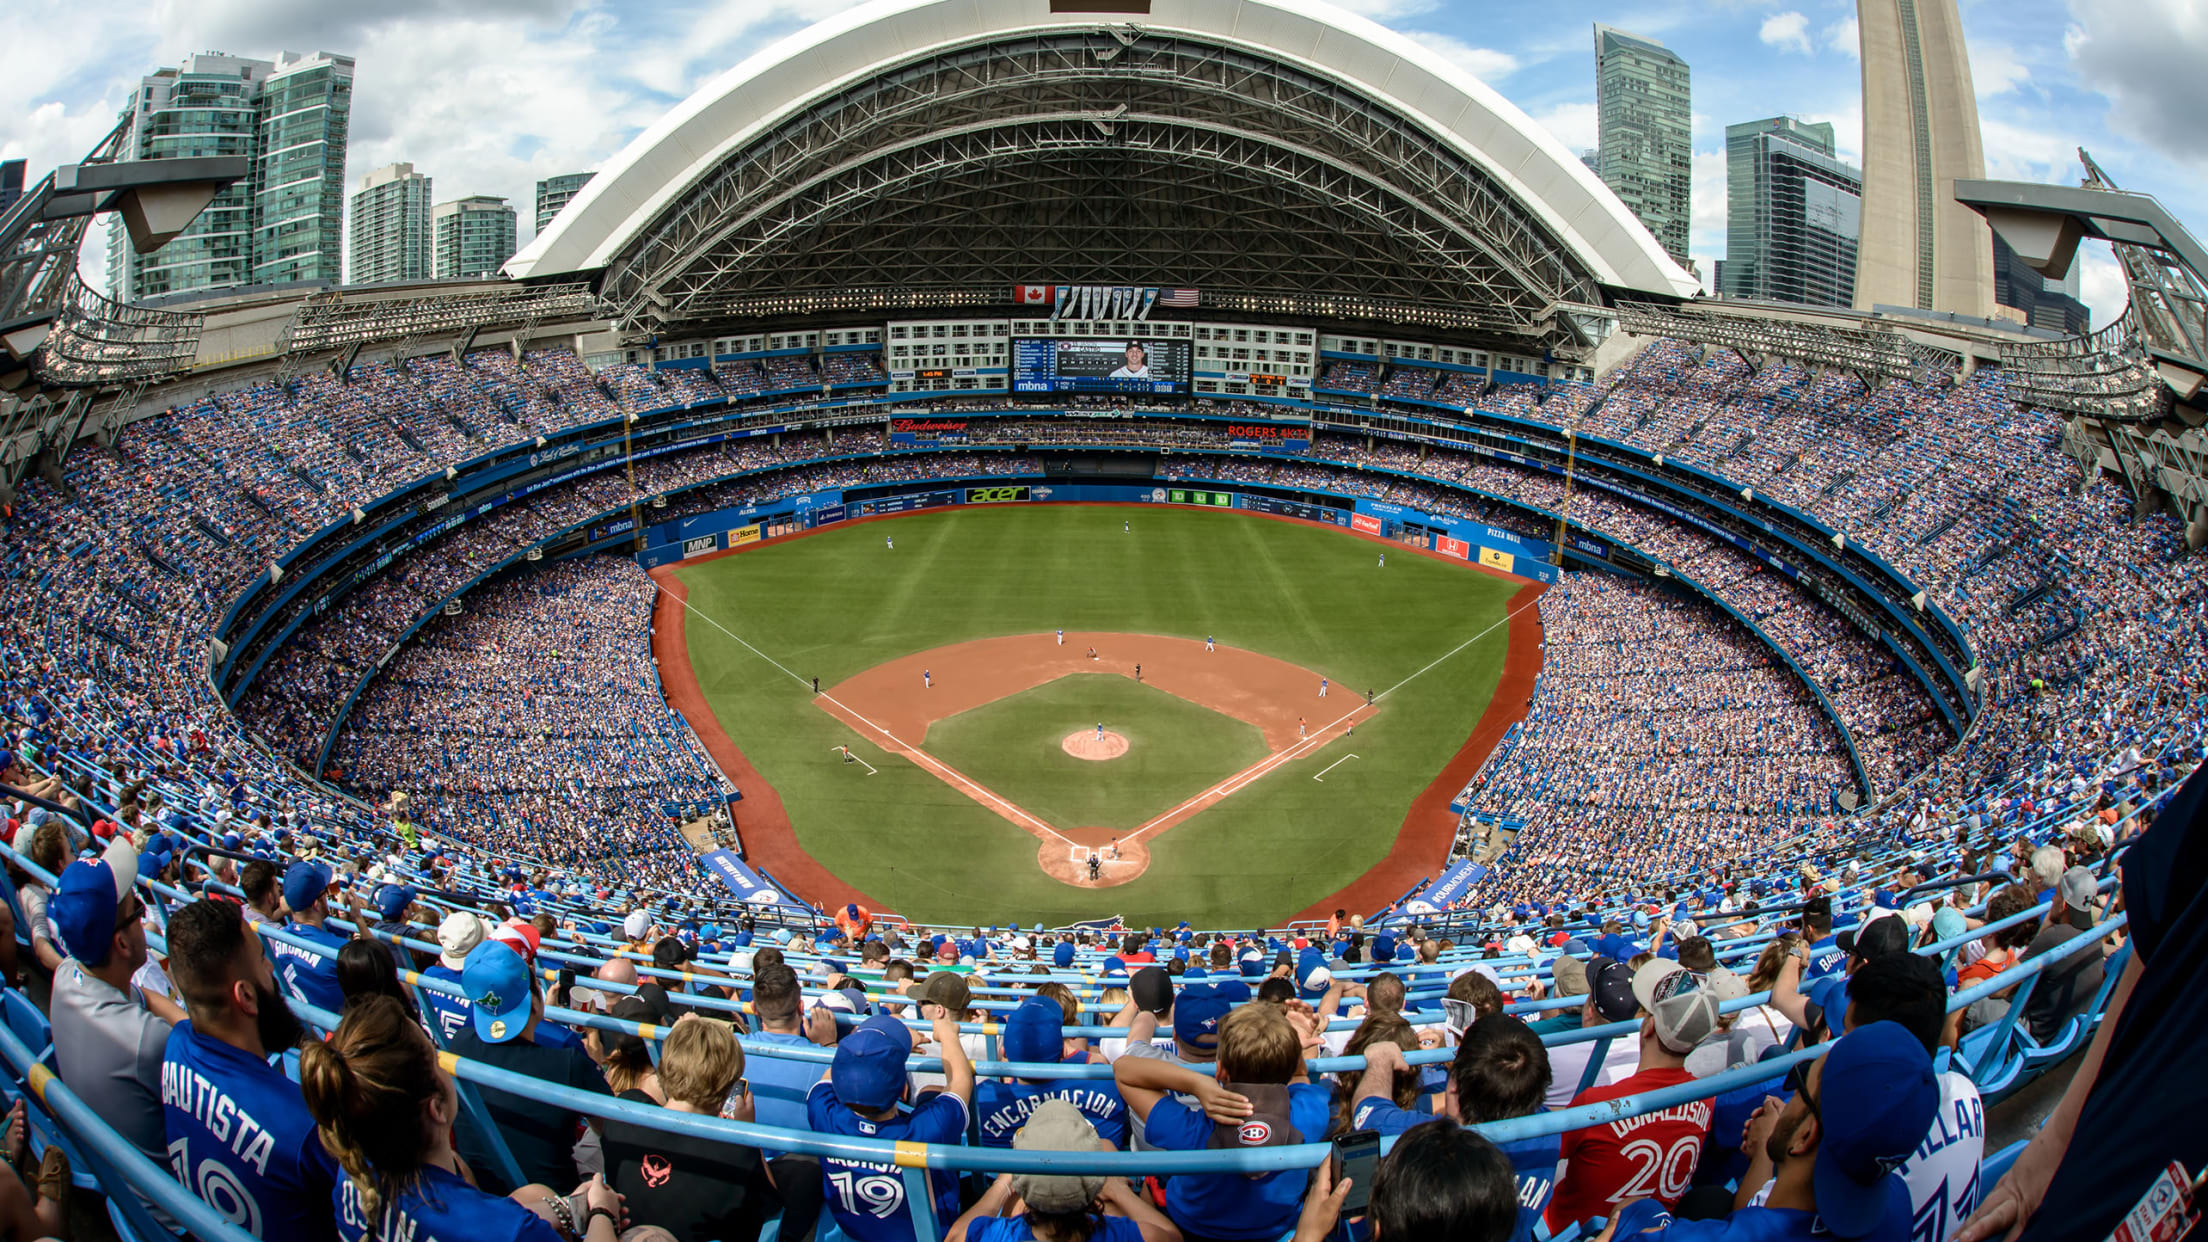

## **Business Objectives**

*  Use data-driven approach to determine if teams are more successful using high offensive, tight defensive, or a balanced strategy, in the following time periods.

          Period 1: before 1920

          Period 2: 1920 to 1960

          Period 3: 1960 to 1990

          Period 4: 1990 to 2010


* Does the strategy used in Period 4 lead **Toronto Blue Jays** and **New York Yankees** to success in the years 2012 and 2015.

     - Success is represented by the number of games won by a Baseball team. (Output variables)

## **DATA EXPLORATION**

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [ ]:
df_baseball = pd.read_csv('baseball_teams.csv')

### Period 1 before 1920

In [ ]:
#Creating dataframe
df_baseball__1920 = pd.DataFrame(df_baseball[(df_baseball['Year '] < 1920)])

#### Select qualified variable

In [ ]:
df_baseball__1920.isnull().sum().sort_values(ascending=False)

Unnamed: 11            703
Sacrifice_Fly          703
Division               703
Hit_By_Pitch           703
Unnamed: 10            703
Caught_Stealing        659
Unnamed: 7             399
World_Series           329
Double_Plays           317
Attendance             279
Stolen_Bases           144
Strike_Outs            120
League                  50
Home_Ball_Park          34
League_Win               0
Earned_Run_Average       0
Team_Name                0
Fielding_Percentage      0
Team                     0
Errors                   0
Strikeouts_Allowed       0
Walks_Allowed            0
Home_Run_Allowed         0
Hits_Allowed             0
Infield_Put_Outs         0
Saves                    0
Shutout                  0
Complete_Games           0
Earned_Runs              0
Games_Lost               0
Runs_Against             0
Franchise                0
Final_Standing           0
Games_Played             0
Games_Won                0
Walks                    0
Home_Runs                0
T

array([[<AxesSubplot:title={'center':'Year '}>,
        <AxesSubplot:title={'center':'Final_Standing'}>,
        <AxesSubplot:title={'center':'Games_Played'}>,
        <AxesSubplot:title={'center':'Unnamed: 7'}>,
        <AxesSubplot:title={'center':'Games_Won'}>,
        <AxesSubplot:title={'center':'Games_Lost'}>],
       [<AxesSubplot:title={'center':'Runs_Scored'}>,
        <AxesSubplot:title={'center':'At_Bats'}>,
        <AxesSubplot:title={'center':'Hits'}>,
        <AxesSubplot:title={'center':'Doubles'}>,
        <AxesSubplot:title={'center':'Triples'}>,
        <AxesSubplot:title={'center':'Home_Runs'}>],
       [<AxesSubplot:title={'center':'Walks'}>,
        <AxesSubplot:title={'center':'Strike_Outs'}>,
        <AxesSubplot:title={'center':'Stolen_Bases'}>,
        <AxesSubplot:title={'center':'Caught_Stealing'}>,
        <AxesSubplot:title={'center':'Hit_By_Pitch'}>,
        <AxesSubplot:title={'center':'Sacrifice_Fly'}>],
       [<AxesSubplot:title={'center':'Runs_Against

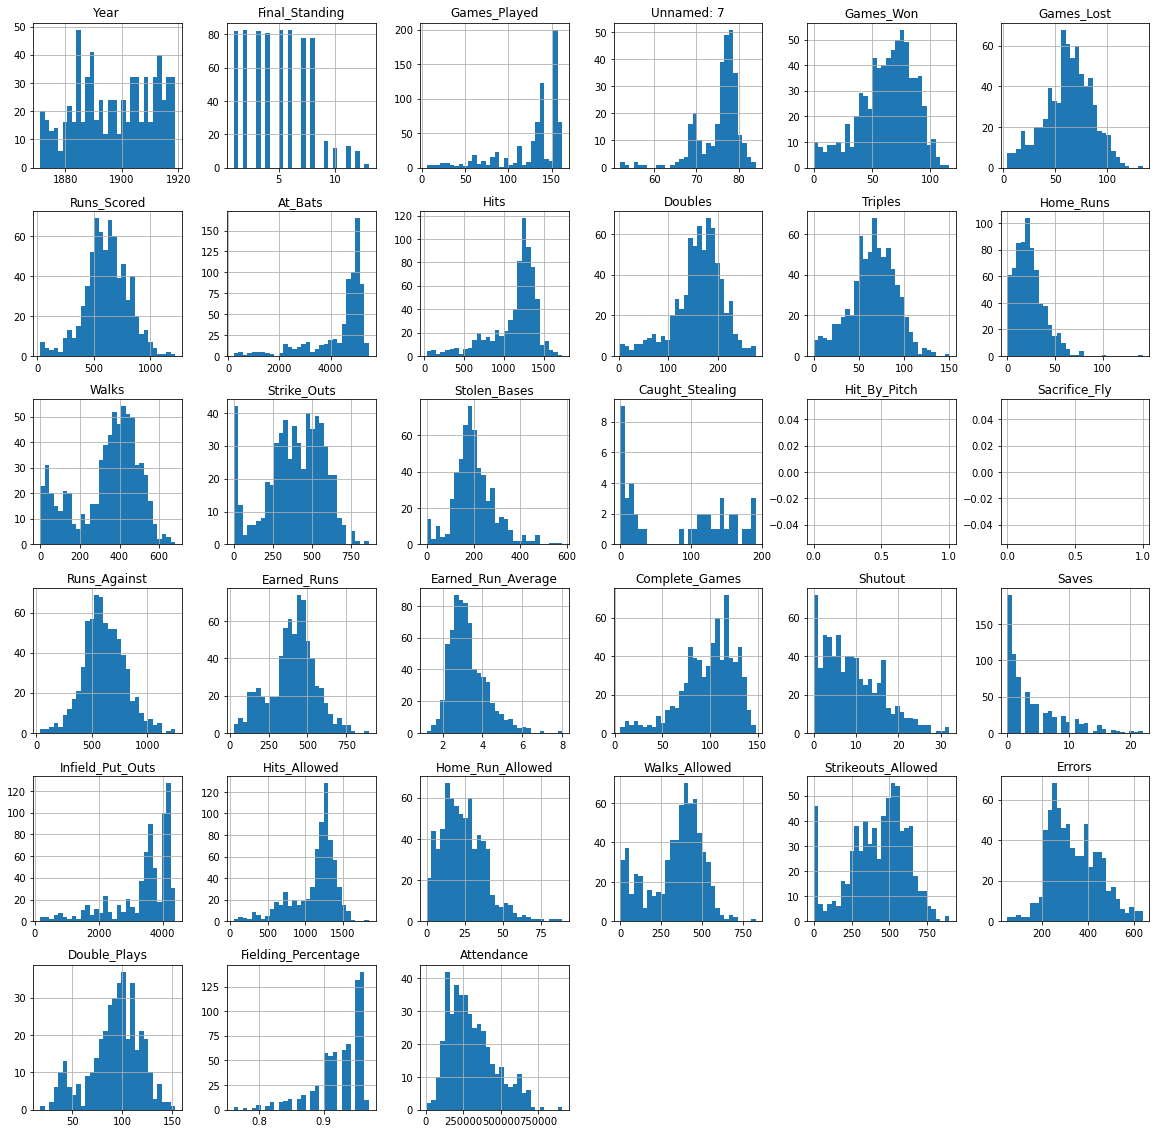

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
df_baseball__1920.hist(bins=30)

#### Build models based on OFFENSIVE VARIABLES

In [ ]:
df_offense = df_baseball__1920[['Games_Won', 'Year ', 'Runs_Scored','At_Bats','Hits','Doubles','Triples','Home_Runs','Walks']]
df_offense
# Create dataframe with only offensive variables

Games_Won  Year   Runs_Scored  At_Bats  Hits  Doubles  Triples  \
0           20   1871          401     1372   426       70       37   
1           19   1871          302     1196   323       52       21   
2           10   1871          249     1186   328       35       40   
3            7   1871          137      746   178       19        8   
4           16   1871          302     1404   403       43       21   
..         ...    ...          ...      ...   ...      ...      ...   
698         47   1919          510     4746  1191      208       50   
699         71   1919          472     4538  1132      130       82   
700         67   1919          533     4672  1234      187       73   
701         54   1919          463     4588  1175      163       52   
702         56   1919          533     4757  1238      177       63   

     Home_Runs  Walks  
0            3     60  
1           10     60  
2            7     26  
3            2     33  
4            1     33  
..         ...    ...  
698         42    323  
699         17    344  
700         31    391  
701         18    304  
702         24    416  

[703 rows x 9 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

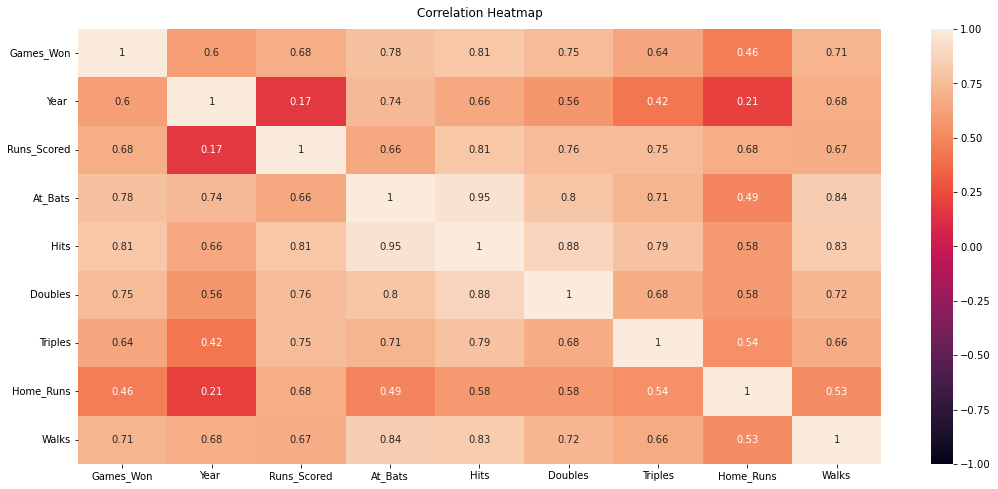

In [ ]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_offense.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
# Gives the Correlation Heatmap for the offensive variables

In [ ]:
df_offense.corr()['Games_Won'].sort_values(ascending=False)

Games_Won      1.000000
Hits           0.808361
At_Bats        0.775265
Doubles        0.749308
Walks          0.712184
Runs_Scored    0.681313
Triples        0.644800
Year           0.602368
Home_Runs      0.456323
Name: Games_Won, dtype: float64

#### Based on the correlations of the variables, six independent variables (Hits, At_Bats, Doubles, Walks, Runs_Scored, Triples) are selected as candidate features

## **MODELLING**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_offense, df_offense['Games_Won'],test_size=0.3, random_state=0)

In [ ]:
x_train.describe()

Games_Won        Year   Runs_Scored      At_Bats         Hits  \
count  492.000000   492.000000   492.000000   492.000000   492.000000   
mean    62.345528  1897.184959   611.528455  4371.979675  1131.506098   
std     22.810709    13.691552   189.754577  1087.560588   299.332798   
min      0.000000  1871.000000    24.000000   272.000000    49.000000   
25%     49.000000  1885.000000   495.500000  4088.000000  1013.000000   
50%     66.000000  1898.000000   605.500000  4821.000000  1226.000000   
75%     78.000000  1910.000000   743.250000  5065.000000  1319.250000   
max    105.000000  1919.000000  1220.000000  5485.000000  1732.000000   

          Doubles     Triples   Home_Runs       Walks  
count  492.000000  492.000000  492.000000  492.000000  
mean   161.680894   65.471545   23.516260  335.158537  
std     49.578075   25.091466   16.154226  158.382414  
min      3.000000    0.000000    0.000000    1.000000  
25%    139.750000   50.000000   12.000000  235.500000  
50%    167.500000   66.000000   21.000000  372.000000  
75%    193.250000   83.000000   32.000000  449.250000  
max    277.000000  150.000000  142.000000  681.000000

In [ ]:
x_test.describe()

Games_Won        Year   Runs_Scored      At_Bats         Hits  \
count  211.000000   211.000000   211.000000   211.000000   211.000000   
mean    63.720379  1897.360190   615.748815  4376.497630  1137.260664   
std     24.185444    13.745757   191.407763  1097.308683   304.591082   
min      0.000000  1871.000000    26.000000   211.000000    33.000000   
25%     49.500000  1887.000000   510.500000  4237.000000  1076.000000   
50%     65.000000  1897.000000   623.000000  4803.000000  1229.000000   
75%     83.000000  1909.000000   725.500000  5076.500000  1324.500000   
max    116.000000  1919.000000  1041.000000  5349.000000  1584.000000   

          Doubles     Triples   Home_Runs       Walks  
count  211.000000  211.000000  211.000000  211.000000  
mean   159.582938   64.146919   23.497630  343.322275  
std     50.080568   25.134538   15.439397  162.815819  
min      5.000000    0.000000    0.000000    0.000000  
25%    134.000000   50.000000   13.000000  251.000000  
50%    165.000000   66.000000   20.000000  390.000000  
75%    193.500000   83.000000   32.000000  461.500000  
max    265.000000  129.000000   80.000000  652.000000

In [ ]:
lm1 = smf.ols(formula="Games_Won ~ Hits + At_Bats + Doubles + Walks + Runs_Scored + Triples + Home_Runs", data=x_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          2.31e-115
Time:                        18:38:40   Log-Likelihood:                -1956.1
No. Observations:                 492   AIC:                             3928.
Df Residuals:                     484   BIC:                             3962.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.8077      3.070     -2.869      0.004     -14.839      -2.776
Hits            0.0169      0.010      1.680      0.094      -0.003       0.037
At_Bats         0.0048      0.002      2.270      0.024       0.001       0.009
Doubles         0.0725      0.025      2.876      0.004       0.023       0.122
Walks           0.0162      0.007      2.265      0.024       0.002       0.030
Runs_Scored     0.0198      0.007      2.748      0.006       0.006       0.034
Triples         0.0814      0.040      2.016      0.044       0.002       0.161
Home_Runs      -0.1497      0.050     -2.981      0.003      -0.248      -0.051
==============================================================================
Omnibus:                       16.666   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.249
Skew:                          -0.396   Prob(JB):                     0.000109
Kurtosis:                       3.512   Cond. No.                     2.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm2 = smf.ols(formula="Games_Won ~ At_Bats + Doubles + Runs_Scored + Walks + Home_Runs", data=x_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          7.56e-116
Time:                        18:38:41   Log-Likelihood:                -1960.4
No. Observations:                 492   AIC:                             3933.
Df Residuals:                     486   BIC:                             3958.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.7724      3.009     -3.580      0.000     -16.685      -4.860
At_Bats         0.0085      0.001      7.218      0.000       0.006       0.011
Doubles         0.0871      0.023      3.768      0.000       0.042       0.132
Runs_Scored     0.0325      0.006      5.839      0.000       0.022       0.043
Walks           0.0164      0.007      2.286      0.023       0.002       0.031
Home_Runs      -0.1490      0.050     -2.955      0.003      -0.248      -0.050
==============================================================================
Omnibus:                       17.947   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.800
Skew:                          -0.414   Prob(JB):                     5.02e-05
Kurtosis:                       3.528   Cond. No.                     2.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm3 = smf.ols(formula="Games_Won ~ At_Bats + Doubles + Runs_Scored", data=x_train).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     323.5
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.39e-115
Time:                        18:38:41   Log-Likelihood:                -1966.9
No. Observations:                 492   AIC:                             3942.
Df Residuals:                     488   BIC:                             3959.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -12.3740      2.528     -4.895      0.000     -17.341      -7.407
At_Bats         0.0102      0.001     11.200      0.000       0.008       0.012
Doubles         0.0786      0.023      3.383      0.001       0.033       0.124
Runs_Scored     0.0282      0.005      5.811      0.000       0.019       0.038
==============================================================================
Omnibus:                       14.162   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.156
Skew:                          -0.364   Prob(JB):                     0.000512
Kurtosis:                       3.459   Cond. No.                     1.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Test model #3

In [ ]:
lm3_predict=lm3.predict(x_test)

In [ ]:
lm3_predict.describe()

count    211.000000
mean      62.345903
std       18.905885
min       -9.087465
25%       59.588459
50%       68.477871
75%       73.682276
max       88.606843
dtype: float64

In [ ]:
predict_values=pd.concat([x_test["Games_Won"], x_test['Year '],lm3_predict],axis=1).set_index('Year ')
predict_values.columns=["actual_Games_Won","predicted_Games_Won"]
predict_values["residual"]=predict_values["actual_Games_Won"]-predict_values["predicted_Games_Won"]

In [ ]:
predict_values.head()

actual_Games_Won  predicted_Games_Won   residual
Year                                                   
1910                 86            75.393771  10.606229
1906                 52            63.607371 -11.607371
1911                 70            75.181444  -5.181444
1914                 84            76.717447   7.282553
1909                 98            75.003946  22.996054

In [ ]:
mae=metrics.mean_absolute_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won']))

In [ ]:
print ('mean absolute error', mae)

mean absolute error 11.342615380416948


In [ ]:
print ('mean squared error', mse)

mean squared error 197.55697730667126


In [ ]:
print ('root mean squared error', rmse)

root mean squared error 14.055496337969402


#### Build models based on DEFENSIVE VARIABLES

In [ ]:
df_defense = df_baseball__1920[['Games_Won', 'Year ', 'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games', 'Shutout','Saves', 'Hits_Allowed','Walks_Allowed', 'Strikeouts_Allowed', 'Infield_Put_Outs','Errors','Fielding_Percentage']]
df_defense
# Create dataframe with only offensive variables

Games_Won  Year   Runs_Against  Earned_Runs  Earned_Run_Average  \
0           20   1871           303          109                3.55   
1           19   1871           241           77                2.76   
2           10   1871           341          116                4.11   
3            7   1871           243           97                5.17   
4           16   1871           313          121                3.72   
..         ...    ...           ...          ...                 ...   
698         47   1919           699          576                4.14   
699         71   1919           466          400                2.88   
700         67   1919           567          437                3.13   
701         54   1919           552          437                3.23   
702         56   1919           570          426                3.01   

     Complete_Games  Shutout  Saves  Hits_Allowed  Walks_Allowed  \
0                22        1      3           367             42   
1                25        0      1           308             28   
2                23        0      0           346             53   
3                19        1      0           261             21   
4                32        1      0           373             42   
..              ...      ...    ...           ...            ...   
698              93        6      2          1391            408   
699              91       17      4          1113            263   
700              78       14      4          1255            421   
701              55        6      8          1146            415   
702              68       13     10          1237            451   

     Strikeouts_Allowed  Infield_Put_Outs  Errors  Fielding_Percentage  
0                    23               828     225                 0.83  
1                    22               753     218                 0.82  
2                    34               762     223                 0.81  
3                    17               507     163                 0.80  
4                    22               879     227                 0.83  
..                  ...               ...     ...                  ...  
698                 397              3756     219                 0.96  
699                 391              3747     160                 0.96  
700                 415              3768     214                 0.96  
701                 414              3651     217                 0.96  
702                 536              3822     227                 0.96  

[703 rows x 14 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

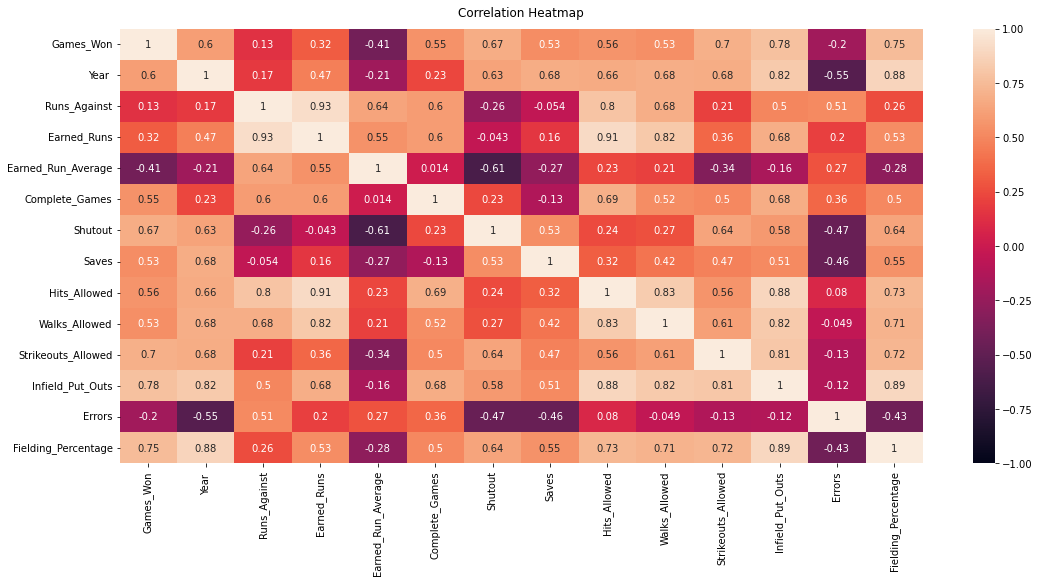

In [ ]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_defense.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
# Gives the Correlation Heatmap for the offensive variables

In [ ]:
df_defense.corr()['Games_Won'].sort_values(ascending=False)

Games_Won              1.000000
Infield_Put_Outs       0.779830
Fielding_Percentage    0.752685
Strikeouts_Allowed     0.695112
Shutout                0.673471
Year                   0.602368
Hits_Allowed           0.555890
Complete_Games         0.553754
Walks_Allowed          0.532710
Saves                  0.526227
Earned_Runs            0.316495
Runs_Against           0.132917
Errors                -0.199159
Earned_Run_Average    -0.408200
Name: Games_Won, dtype: float64

#### Based on the correlations of the variables, four independent variables (Infield_Put_Outs, Fielding_Percentage, Strikeouts_Allowed, Shutout, Earned_Run_Average) are selected as candidate features

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_defense, df_defense['Games_Won'],test_size=0.3, random_state=0)

In [ ]:
x_train1.describe()

Games_Won        Year   Runs_Against  Earned_Runs  Earned_Run_Average  \
count  492.000000   492.000000    492.000000   492.000000          492.000000   
mean    62.345528  1897.184959    614.597561   404.941057            3.260671   
std     22.810709    13.691552    187.175448   148.591728            0.895953   
min      0.000000  1871.000000     34.000000    25.000000            1.220000   
25%     49.000000  1885.000000    497.750000   320.500000            2.650000   
50%     66.000000  1898.000000    602.000000   419.000000            3.060000   
75%     78.000000  1910.000000    739.250000   501.250000            3.735000   
max    105.000000  1919.000000   1252.000000   895.000000            6.910000   

       Complete_Games     Shutout       Saves  Hits_Allowed  Walks_Allowed  \
count      492.000000  492.000000  492.000000    492.000000     492.000000   
mean        98.806911    9.260163    3.804878   1132.099593     337.932927   
std         28.125072    6.608440    4.531238    298.282709     162.446537   
min          7.000000    0.000000    0.000000     49.000000       3.000000   
25%         81.000000    4.000000    0.000000   1004.250000     227.250000   
50%        104.000000    8.000000    2.000000   1221.000000     374.500000   
75%        119.000000   13.000000    6.000000   1313.000000     456.250000   
max        148.000000   32.000000   22.000000   1844.000000     827.000000   

       Strikeouts_Allowed  Infield_Put_Outs      Errors  Fielding_Percentage  
count          492.000000        492.000000  492.000000           492.000000  
mean           427.975610       3385.829268  340.693089             0.922886  
std            192.841713        938.952740  108.410405             0.038545  
min              0.000000        213.000000   47.000000             0.760000  
25%            299.750000       3008.250000  256.000000             0.900000  
50%            469.500000       3651.000000  322.000000             0.930000  
75%            564.500000       4095.000000  419.000000             0.950000  
max            887.000000       4401.000000  639.000000             0.970000

In [ ]:
x_test1.describe()

Games_Won        Year   Runs_Against  Earned_Runs  Earned_Run_Average  \
count  211.000000   211.000000    211.000000   211.000000          211.000000   
mean    63.720379  1897.360190    608.592417   401.857820            3.258104   
std     24.185444    13.745757    186.167499   144.224259            0.965884   
min      0.000000  1871.000000    140.000000    48.000000            1.610000   
25%     49.500000  1887.000000    490.000000   337.000000            2.580000   
50%     65.000000  1897.000000    592.000000   414.000000            3.080000   
75%     83.000000  1909.000000    714.000000   489.500000            3.705000   
max    116.000000  1919.000000   1112.000000   737.000000            8.000000   

       Complete_Games     Shutout       Saves  Hits_Allowed  Walks_Allowed  \
count      211.000000  211.000000  211.000000    211.000000     211.000000   
mean        98.232227    9.080569    4.085308   1134.004739     342.507109   
std         27.988231    6.884638    4.390718    290.432658     162.689754   
min          6.000000    0.000000    0.000000    144.000000       0.000000   
25%         83.000000    4.000000    0.500000   1039.000000     267.000000   
50%        106.000000    8.000000    2.000000   1236.000000     392.000000   
75%        118.000000   13.000000    6.000000   1317.000000     456.500000   
max        147.000000   32.000000   18.000000   1562.000000     701.000000   

       Strikeouts_Allowed  Infield_Put_Outs      Errors  Fielding_Percentage  
count          211.000000        211.000000  211.000000           211.000000  
mean           414.094787       3396.284360  332.312796             0.924360  
std            191.062644        947.972109  106.360155             0.040672  
min              0.000000        162.000000   70.000000             0.760000  
25%            299.000000       3208.500000  250.500000             0.910000  
50%            438.000000       3660.000000  311.000000             0.940000  
75%            557.500000       4107.000000  416.500000             0.950000  
max            895.000000       4329.000000  611.000000             0.970000

In [ ]:
lm4 = smf.ols(formula="Games_Won ~ Infield_Put_Outs +Fielding_Percentage + Strikeouts_Allowed + Shutout + Earned_Run_Average", data=x_train1).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     226.0
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          2.75e-124
Time:                        18:38:42   Log-Likelihood:                -1940.7
No. Observations:                 492   AIC:                             3893.
Df Residuals:                     486   BIC:                             3919.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.0495     27.907      0.181      0.856     -49.783      59.883
Infield_Put_Outs        0.0161      0.002      9.682      0.000       0.013       0.019
Fielding_Percentage    19.4407     34.112      0.570      0.569     -47.584      86.465
Strikeouts_Allowed     -0.0035      0.005     -0.643      0.520      -0.014       0.007
Shutout                 0.4976      0.146      3.405      0.001       0.210       0.785
Earned_Run_Average     -5.5602      0.875     -6.353      0.000      -7.280      -3.841
==============================================================================
Omnibus:                        0.104   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.200
Skew:                          -0.010   Prob(JB):                        0.905
Kurtosis:                       2.903   Cond. No.                     2.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Remove the variable with high P value

In [ ]:
lm5 = smf.ols(formula="Games_Won ~ Infield_Put_Outs + Shutout + Earned_Run_Average", data=x_train1).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     377.2
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.12e-126
Time:                        18:38:42   Log-Likelihood:                -1941.1
No. Observations:                 492   AIC:                             3890.
Df Residuals:                     488   BIC:                             3907.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.7632      3.448      6.022      0.000      13.989      27.538
Infield_Put_Outs       0.0162      0.001     20.319      0.000       0.015       0.018
Shutout                0.5019      0.141      3.567      0.000       0.225       0.778
Earned_Run_Average    -5.4741      0.847     -6.462      0.000      -7.138      -3.810
==============================================================================
Omnibus:                        0.055   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.125
Skew:                          -0.017   Prob(JB):                        0.939
Kurtosis:                       2.930   Cond. No.                     2.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Test model #5

In [ ]:
lm5_predict=lm5.predict(x_test1)
lm5_predict.describe()

count    211.000000
mean      62.438607
std       19.922749
min      -20.408224
25%       51.614713
50%       65.466976
75%       77.458804
max       94.000538
dtype: float64

In [ ]:
predict_values=pd.concat([x_test1["Games_Won"], x_test1['Year '],lm5_predict],axis=1).set_index('Year ')
predict_values.columns=["actual_Games_Won","predicted_Games_Won"]
predict_values["residual"]=predict_values["actual_Games_Won"]-predict_values["predicted_Games_Won"]
predict_values.head()

actual_Games_Won  predicted_Games_Won   residual
Year                                                   
1910                 86            78.588636   7.411364
1906                 52            71.854108 -19.854108
1911                 70            74.096221  -4.096221
1914                 84            82.179337   1.820663
1909                 98            85.852253  12.147747

In [ ]:
mae=metrics.mean_absolute_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won']))
print ('mean absolute error', mae)

mean absolute error 10.356172629882774


In [ ]:
print ('mean squared error', mse)

mean squared error 170.2995280724968


In [ ]:
print ('root mean squared error', rmse)

root mean squared error 13.04988613254908


#### COMBINED

In [ ]:
df_combined = df_baseball__1920[['Year ', 'Games_Won','At_Bats', 'Doubles', 'Runs_Scored', 'Infield_Put_Outs', 'Shutout', 'Earned_Run_Average']]
df_combined

Year   Games_Won  At_Bats  Doubles  Runs_Scored  Infield_Put_Outs  \
0     1871         20     1372       70          401               828   
1     1871         19     1196       52          302               753   
2     1871         10     1186       35          249               762   
3     1871          7      746       19          137               507   
4     1871         16     1404       43          302               879   
..     ...        ...      ...      ...          ...               ...   
698   1919         47     4746      208          510              3756   
699   1919         71     4538      130          472              3747   
700   1919         67     4672      187          533              3768   
701   1919         54     4588      163          463              3651   
702   1919         56     4757      177          533              3822   

     Shutout  Earned_Run_Average  
0          1                3.55  
1          0                2.76  
2          0                4.11  
3          1                5.17  
4          1                3.72  
..       ...                 ...  
698        6                4.14  
699       17                2.88  
700       14                3.13  
701        6                3.23  
702       13                3.01  

[703 rows x 8 columns]

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_combined, df_combined['Games_Won'],test_size=0.3, random_state=0)

In [ ]:
x_train2.describe()

Year    Games_Won      At_Bats     Doubles  Runs_Scored  \
count   492.000000  492.000000   492.000000  492.000000   492.000000   
mean   1897.184959   62.345528  4371.979675  161.680894   611.528455   
std      13.691552   22.810709  1087.560588   49.578075   189.754577   
min    1871.000000    0.000000   272.000000    3.000000    24.000000   
25%    1885.000000   49.000000  4088.000000  139.750000   495.500000   
50%    1898.000000   66.000000  4821.000000  167.500000   605.500000   
75%    1910.000000   78.000000  5065.000000  193.250000   743.250000   
max    1919.000000  105.000000  5485.000000  277.000000  1220.000000   

       Infield_Put_Outs     Shutout  Earned_Run_Average  
count        492.000000  492.000000          492.000000  
mean        3385.829268    9.260163            3.260671  
std          938.952740    6.608440            0.895953  
min          213.000000    0.000000            1.220000  
25%         3008.250000    4.000000            2.650000  
50%         3651.000000    8.000000            3.060000  
75%         4095.000000   13.000000            3.735000  
max         4401.000000   32.000000            6.910000

In [ ]:
x_test2.describe()

Year    Games_Won      At_Bats     Doubles  Runs_Scored  \
count   211.000000  211.000000   211.000000  211.000000   211.000000   
mean   1897.360190   63.720379  4376.497630  159.582938   615.748815   
std      13.745757   24.185444  1097.308683   50.080568   191.407763   
min    1871.000000    0.000000   211.000000    5.000000    26.000000   
25%    1887.000000   49.500000  4237.000000  134.000000   510.500000   
50%    1897.000000   65.000000  4803.000000  165.000000   623.000000   
75%    1909.000000   83.000000  5076.500000  193.500000   725.500000   
max    1919.000000  116.000000  5349.000000  265.000000  1041.000000   

       Infield_Put_Outs     Shutout  Earned_Run_Average  
count        211.000000  211.000000          211.000000  
mean        3396.284360    9.080569            3.258104  
std          947.972109    6.884638            0.965884  
min          162.000000    0.000000            1.610000  
25%         3208.500000    4.000000            2.580000  
50%         3660.000000    8.000000            3.080000  
75%         4107.000000   13.000000            3.705000  
max         4329.000000   32.000000            8.000000

#### Include all varibales from defensive and offensive model

In [ ]:
lm6 = smf.ols(formula="Games_Won ~ At_Bats + Doubles + Runs_Scored + Infield_Put_Outs + Shutout + Earned_Run_Average", data=x_train2).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1185.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          4.57e-286
Time:                        18:38:43   Log-Likelihood:                -1559.4
No. Observations:                 492   AIC:                             3133.
Df Residuals:                     485   BIC:                             3162.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.9920      1.708     12.288      0.000      17.635      24.349
At_Bats               -0.0349      0.003    -13.652      0.000      -0.040      -0.030
Doubles                0.0356      0.010      3.447      0.001       0.015       0.056
Runs_Scored            0.0967      0.003     30.774      0.000       0.090       0.103
Infield_Put_Outs       0.0429      0.003     15.279      0.000       0.037       0.048
Shutout                0.7233      0.071     10.151      0.000       0.583       0.863
Earned_Run_Average    -7.0683      0.396    -17.862      0.000      -7.846      -6.291
==============================================================================
Omnibus:                        5.679   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.557
Skew:                           0.220   Prob(JB):                       0.0621
Kurtosis:                       3.278   Cond. No.                     3.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Further simply model by removing variables which are not approximatly normally distributed

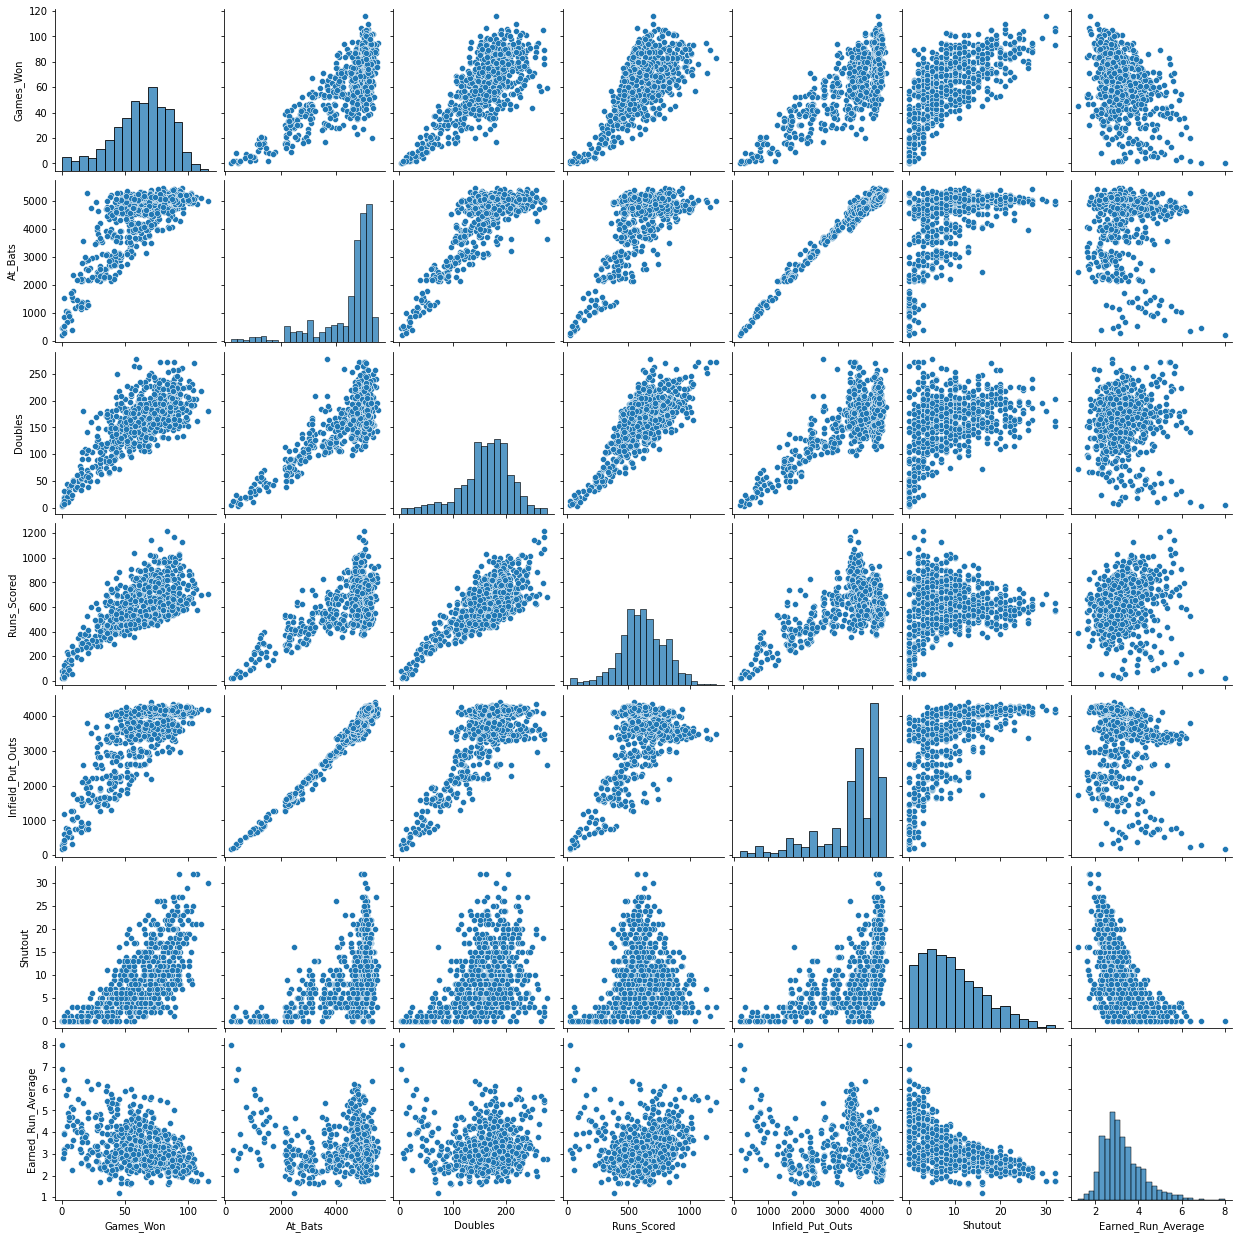

In [ ]:
sns.pairplot(df_combined, vars=['Games_Won', 'At_Bats', 'Doubles', 'Runs_Scored', 'Infield_Put_Outs', 'Shutout', 'Earned_Run_Average'])
plt.show()

In [ ]:
lm7 = smf.ols(formula="Games_Won ~ Doubles + Runs_Scored + Shutout + Earned_Run_Average", data=x_train2).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1068.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.92e-239
Time:                        18:38:52   Log-Likelihood:                -1675.5
No. Observations:                 492   AIC:                             3361.
Df Residuals:                     487   BIC:                             3382.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             15.8266      2.008      7.883      0.000      11.882      19.772
Doubles                0.0802      0.012      6.930      0.000       0.057       0.103
Runs_Scored            0.0694      0.003     24.668      0.000       0.064       0.075
Shutout                1.4143      0.072     19.550      0.000       1.272       1.556
Earned_Run_Average    -6.7375      0.493    -13.670      0.000      -7.706      -5.769
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.788
Skew:                           0.098   Prob(JB):                        0.674
Kurtosis:                       3.020   Cond. No.                     4.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Test model #7

In [ ]:
lm7_predict=lm7.predict(x_test2)

In [ ]:
lm7_predict.describe()

count    211.000000
mean      62.233232
std       23.056865
min      -35.869017
25%       50.202116
50%       64.722460
75%       77.608090
max      109.889149
dtype: float64

In [ ]:
predict_values=pd.concat([x_test2["Games_Won"], x_test2['Year '],lm7_predict],axis=1).set_index('Year ')
predict_values.columns=["actual_Games_Won","predicted_Games_Won"]
predict_values["residual"]=predict_values["actual_Games_Won"]-predict_values["predicted_Games_Won"]
predict_values.head()

actual_Games_Won  predicted_Games_Won   residual
Year                                                   
1910                 86            77.749722   8.250278
1906                 52            44.595603   7.404397
1911                 70            61.268904   8.731096
1914                 84            88.729572  -4.729572
1909                 98            87.609001  10.390999

In [ ]:
mae=metrics.mean_absolute_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won']))
print ('mean absolute error', mae)

mean absolute error 6.262110845287054


In [ ]:
print ('mean squared error', mse)

mean squared error 62.83238611839062


In [ ]:
print ('root mean squared error', rmse)

root mean squared error 7.926688218820684


#### The seventh model's rms error of the residuals is smaller which shows that the model has the best predictive capabilities for this data set 

### Evaluation of Period 1 Model
- This model (lm7) has a higher **R-squared** (0.898) than the other models, which means that this model provides a better fit to the data than other previous models.

- Variables were chosen based on the correlation with Games Won. The correlation for each variable was also analyzed to make sure they were not highly correlated with each other.

- The Doubles, Runs Scored, Earned Run Average and Shutouts have significant **p-values**. Thus we reject the null hypothesis (that there is no association between those variables and Games Won) for the intercept, Runs Scored,Earned Run Average and Shutouts.

- The model has 2 offensive variable and 2 defensive variables and due to the coefficients, it is a balance of the two. It also has least amount of errors in the predictions.

- The final variables for the period before 1920 are Doubles, Runs_Scored, Shutout, Earned_Run_Average

- Doubles are Runs_Scored are approximately normally distributed, while Shutout and Earned_Run_Average are slightly right skewed

$y = \beta_0 + \beta_1 \times Runs Scored + \beta_2 \times Shutout + \beta_3 \times Doubles + \beta_4 \times Earned Run Average$

$y = 15.8266 - 0.0802 \ * Doubles + 0.0694 \ * Runs Scored + 1.4143 \ * Shutout - 6.7375 \ * Earned Run Average $

## Period 2: 1920-1960

In [ ]:
#Creating a dataframe for period 2
df_period2 = pd.DataFrame(df_baseball[(df_baseball['Year ']>=1920) & (df_baseball['Year ']<=1960)], columns = ['Games_Won', 'Runs_Scored','At_Bats','Hits','Doubles','Triples','Home_Runs','Walks', 'Runs_Against','Earned_Runs','Earned_Run_Average','Complete_Games','Shutout','Saves','Infield_Put_Outs','Hits_Allowed','Home_Run_Allowed', 'Walks_Allowed','Strikeouts_Allowed','Errors','Fielding_Percentage'])
df_period2.describe()

Games_Won  Runs_Scored      At_Bats         Hits     Doubles  \
count  656.000000   656.000000   656.000000   656.000000  656.000000   
mean    76.676829   712.375000  5312.492378  1436.890244  241.966463   
std     14.289669   106.405187   108.493289   107.894804   37.978364   
min     38.000000   394.000000  4898.000000  1174.000000  153.000000   
25%     66.000000   642.750000  5234.000000  1358.000000  215.000000   
50%     78.000000   705.000000  5301.000000  1426.000000  239.000000   
75%     87.000000   772.500000  5379.000000  1509.250000  265.000000   
max    111.000000  1067.000000  5667.000000  1783.000000  373.000000   

          Triples   Home_Runs       Walks  Runs_Against  Earned_Runs  ...  \
count  656.000000  656.000000  656.000000    656.000000   656.000000  ...   
mean    57.582317   90.368902  516.504573    712.375000   612.205793  ...   
std     18.738113   42.176777   93.125754    104.673726    90.215664  ...   
min     19.000000   16.000000  283.000000    475.000000   399.000000  ...   
25%     44.000000   56.000000  449.000000    637.000000   547.750000  ...   
50%     55.000000   86.000000  506.000000    704.500000   603.000000  ...   
75%     69.000000  117.250000  580.000000    774.250000   668.250000  ...   
max    122.000000  221.000000  835.000000   1199.000000  1023.000000  ...   

       Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  \
count      656.000000  656.000000  656.000000        656.000000    656.000000   
mean        65.128049    9.564024   15.721037       4130.153963   1436.623476   
std         15.450252    4.311765    7.294037         62.425937    112.989995   
min         26.000000    1.000000    2.000000       3891.000000   1163.000000   
25%         54.000000    6.000000   10.000000       4089.000000   1360.750000   
50%         66.500000    9.000000   15.000000       4131.000000   1429.000000   
75%         76.000000   12.000000   20.000000       4173.000000   1507.250000   
max        109.000000   26.000000   42.000000       4299.000000   1993.000000   

       Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  \
count        656.000000     656.000000          656.000000  656.000000   
mean          90.368902     516.233232          549.623476  168.966463   
std           34.254698      89.274423          129.580262   33.330482   
min           25.000000     257.000000          310.000000   99.000000   
25%           65.000000     452.750000          448.000000  145.000000   
50%           84.000000     513.000000          534.500000  167.500000   
75%          113.000000     577.250000          636.250000  190.000000   
max          187.000000     812.000000         1122.000000  294.000000   

       Fielding_Percentage  
count           656.000000  
mean              0.967774  
std               0.005736  
min               0.950000  
25%               0.960000  
50%               0.970000  
75%               0.970000  
max               0.980000  

[8 rows x 21 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

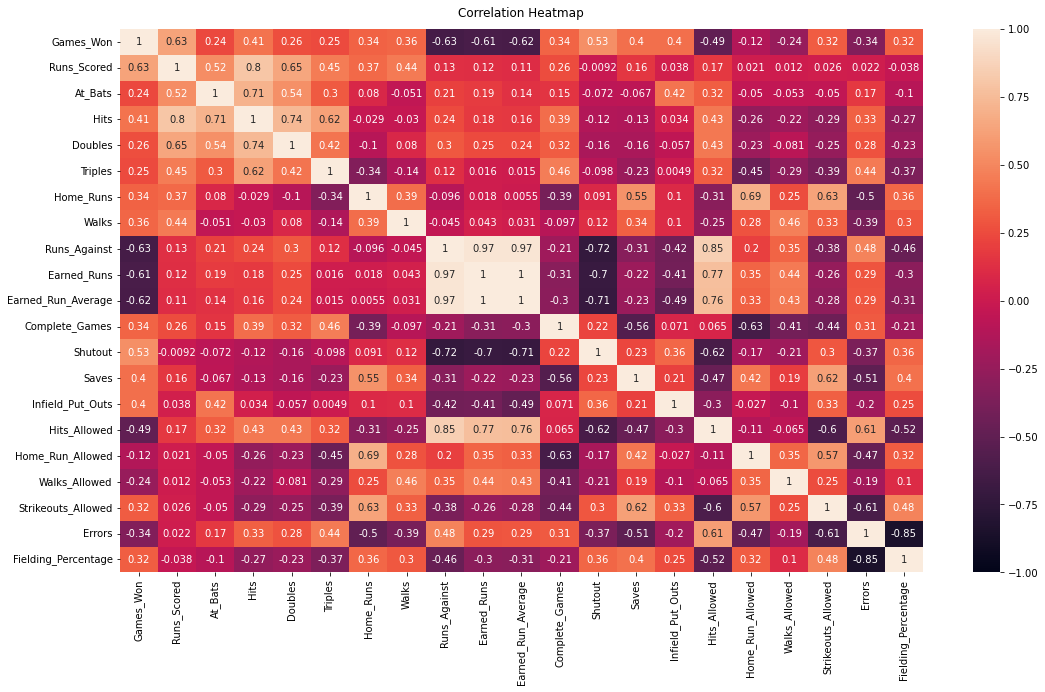

In [ ]:
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(df_period2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
df_period2.corr()['Games_Won'].sort_values(ascending=False)

Games_Won              1.000000
Runs_Scored            0.630446
Shutout                0.533875
Hits                   0.406878
Infield_Put_Outs       0.398372
Saves                  0.397917
Walks                  0.355075
Complete_Games         0.343912
Home_Runs              0.337838
Fielding_Percentage    0.322760
Strikeouts_Allowed     0.315247
Doubles                0.258201
Triples                0.249142
At_Bats                0.238560
Home_Run_Allowed      -0.119464
Walks_Allowed         -0.243707
Errors                -0.342777
Hits_Allowed          -0.494073
Earned_Runs           -0.611269
Earned_Run_Average    -0.624095
Runs_Against          -0.632867
Name: Games_Won, dtype: float64

### Model with both offensive and defensive stats that are correlated variables to "Games_Won" that are independent of eachother
#### In this case, Runs_Scored and Shutout

In [ ]:
x_trainp2, x_testp2, y_trainp2, y_testp2 = train_test_split(df_period2, df_period2['Games_Won'],test_size=0.3, random_state=0)

In [ ]:
lm_period2_1 = smf.ols(formula="Games_Won ~ Runs_Scored + Shutout", data=x_trainp2).fit()
lm_period2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     504.7
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          2.52e-116
Time:                        18:40:10   Log-Likelihood:                -1608.0
No. Observations:                 459   AIC:                             3222.
Df Residuals:                     456   BIC:                             3234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2734      2.647     -0.481      0.631      -6.475       3.928
Runs_Scored     0.0848      0.003     24.833      0.000       0.078       0.092
Shutout         1.8544      0.090     20.688      0.000       1.678       2.031
==============================================================================
Omnibus:                        0.839   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.636
Skew:                          -0.011   Prob(JB):                        0.727
Kurtosis:                       3.181   Cond. No.                     5.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_period22 = pd.DataFrame(df_baseball[(df_baseball['Year ']>=1920) & (df_baseball['Year ']<=1960)], columns = ['Runs_Scored','Shutout','Saves'])

array([[<AxesSubplot:title={'center':'Runs_Scored'}>,
        <AxesSubplot:title={'center':'Shutout'}>],
       [<AxesSubplot:title={'center':'Saves'}>, <AxesSubplot:>]],
      dtype=object)

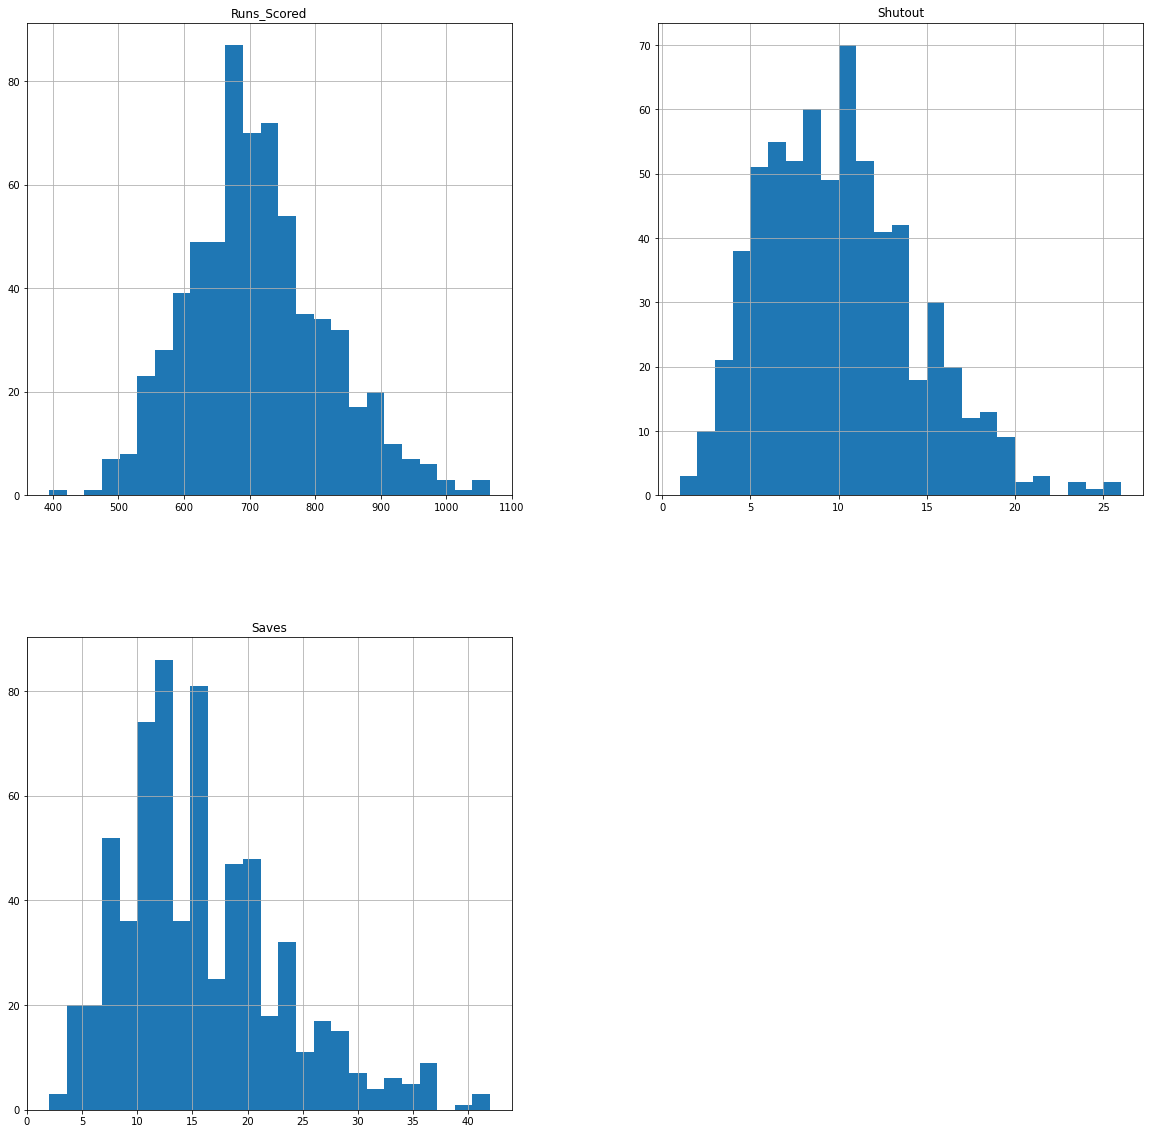

In [ ]:
df_period22.hist(bins=25)

In [ ]:
lm_period2_2 = smf.ols(formula="Games_Won ~ Runs_Scored+Shutout -1", data=x_trainp2).fit()
lm_period2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.151e+04
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                        0.00
Time:                        18:40:11   Log-Likelihood:                         -1608.1
No. Observations:                 459   AIC:                                      3220.
Df Residuals:                     457   BIC:                                      3228.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.0833      0.001     69.588      0.000       0.081       0.086
Shutout         1.8392      0.084     21.953      0.000       1.675       2.004
==============================================================================
Omnibus:                        0.732   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.531
Skew:                          -0.004   Prob(JB):                        0.767
Kurtosis:                       3.166   Cond. No.                         162.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm_p2 = smf.ols(formula="Games_Won ~ Shutout + Runs_Scored + Saves ", data=x_trainp2).fit()
lm_p2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     403.5
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          9.09e-128
Time:                        18:40:11   Log-Likelihood:                -1578.1
No. Observations:                 459   AIC:                             3164.
Df Residuals:                     455   BIC:                             3181.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.0065      2.492     -1.206      0.228      -7.904       1.891
Shutout         1.7026      0.086     19.746      0.000       1.533       1.872
Runs_Scored     0.0806      0.003     24.816      0.000       0.074       0.087
Saves           0.3935      0.049      7.953      0.000       0.296       0.491
==============================================================================
Omnibus:                        0.938   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                0.734
Skew:                           0.064   Prob(JB):                        0.693
Kurtosis:                       3.149   Cond. No.                     5.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm_final_p2 = smf.ols(formula="Games_Won ~ Shutout + Runs_Scored + Saves -1 ", data=x_trainp2).fit()
lm_final_p2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.627e+04
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                        0.00
Time:                        18:47:53   Log-Likelihood:                         -1578.9
No. Observations:                 459   AIC:                                      3164.
Df Residuals:                     456   BIC:                                      3176.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Shutout         1.6689      0.082     20.449      0.000       1.508       1.829
Runs_Scored     0.0770      0.001     56.028      0.000       0.074       0.080
Saves           0.3882      0.049      7.874      0.000       0.291       0.485
==============================================================================
Omnibus:                        0.836   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.652
Skew:                           0.072   Prob(JB):                        0.722
Kurtosis:                       3.115   Cond. No.                         171.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Correlation Heatmap')

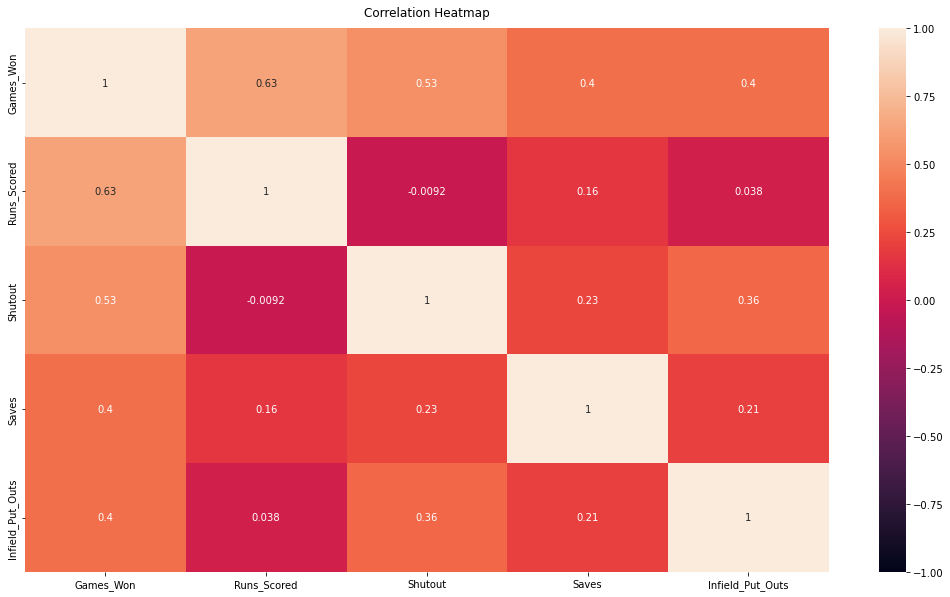

In [ ]:
df_period22 = pd.DataFrame(df_baseball[(df_baseball['Year ']>=1920) & (df_baseball['Year ']<=1960)], columns = ['Games_Won', 'Runs_Scored','Shutout','Saves','Infield_Put_Outs'])
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(df_period22.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## **Prediction**
#### Model2 (Runs Scored + Shutouts w/o intercept)

In [ ]:
lm_period2_predict=lm_final_p2.predict(x_testp2)
lm_period2_predict

1341     70.883407
1195     68.685909
717      71.677354
950     101.767759
788      76.170612
           ...    
1309     86.391260
1015     71.933623
875      85.367457
800      59.831358
1339     68.431954
Length: 197, dtype: float64

In [ ]:
predict_valuesp2=pd.concat([x_testp2["Games_Won"],lm_period2_predict],axis=1)
predict_valuesp2.columns=["Actual_GamesWon","Predicted_GamesWon"]
predict_valuesp2["residual"]=predict_valuesp2["Actual_GamesWon"]-predict_valuesp2["Predicted_GamesWon"]
predict_valuesp2

Actual_GamesWon  Predicted_GamesWon   residual
1341               71           70.883407   0.116593
1195               57           68.685909 -11.685909
717                75           71.677354   3.322646
950                93          101.767759  -8.767759
788                80           76.170612   3.829388
...               ...                 ...        ...
1309               87           86.391260   0.608740
1015               77           71.933623   5.066377
875                80           85.367457  -5.367457
800                71           59.831358  11.168642
1339               78           68.431954   9.568046

[197 rows x 3 columns]

In [ ]:
predict_valuesp2.head()

Actual_GamesWon  Predicted_GamesWon   residual
1341               71           70.883407   0.116593
1195               57           68.685909 -11.685909
717                75           71.677354   3.322646
950                93          101.767759  -8.767759
788                80           76.170612   3.829388

In [ ]:
maep2=metrics.mean_absolute_error(predict_valuesp2['Actual_GamesWon'], predict_valuesp2['Predicted_GamesWon'])
msep2=metrics.mean_squared_error(predict_valuesp2['Actual_GamesWon'], predict_valuesp2['Predicted_GamesWon'])
rmsep2=np.sqrt(metrics.mean_squared_error(predict_valuesp2['Actual_GamesWon'], predict_valuesp2['Predicted_GamesWon']))


In [ ]:
print ('mean absolute error', maep2)

mean absolute error 6.032515126983888


In [ ]:
print ('mean squared error', msep2)

mean squared error 57.63688852004191


In [ ]:
print ('root mean squared error', rmsep2)

root mean squared error 7.591896240073484


### Evaluation of Period 2 Model
- This model (lm_p2) has a higher **R-squared** (0.991) than the other models, which means that this model provides a better fit to the data than other previous models.

- Variables were chosen based on the correlation with Games Won. The correlation for each variable was also analyzed to make sure they were not highly correlated with each other.

- The Runs Scored, Saves and Shutouts have significant **p-values**. Thus we reject the null hypothesis (that there is no association between those variables and Games Won) for Runs Scored, Saves and Shutouts.

- The model has 1 offensive variable and 2 defensive variables and due to the coefficients, it is a mostly defensive strategy. It also has least amount of errors in the predictions.

- The final variables for the period 1920 to 1960 are Runs_Scored, Shutout and Saves.

- Runs_Scored are approximately normally distributed, while Shutout and Saves are slightly right skewed

$y = \beta_0 + \beta_1 \times Runs Scored + \beta_2 \times Shutout + \beta_3 \times Saves $

$y =  0.3882 \ * Saves + 0.0770 \ * Runs Scored + 1.6689 \ * Shutout $

## Period 3: 1960-1990

In [ ]:
#Creating a dataframe for period 3
df_period3_v1 = pd.DataFrame(df_baseball[(df_baseball['Year ']>=1960) & (df_baseball['Year ']<=1990)], columns = ['Games_Won', 'Runs_Scored','At_Bats','Hits','Doubles','Triples','Home_Runs','Walks', 'Runs_Against','Earned_Runs','Earned_Run_Average','Complete_Games','Shutout','Saves','Infield_Put_Outs','Hits_Allowed','Home_Run_Allowed', 'Walks_Allowed','Strikeouts_Allowed','Errors','Fielding_Percentage','Sacrifice_Fly','Hit_By_Pitch','Caught_Stealing','Double_Plays','Stolen_Bases','Strike_Outs'])

In [ ]:
df_period3_v1.isnull().sum().sort_values(ascending=False)

Hit_By_Pitch           730
Sacrifice_Fly          730
Games_Won                0
Infield_Put_Outs         0
Stolen_Bases             0
Double_Plays             0
Caught_Stealing          0
Fielding_Percentage      0
Errors                   0
Strikeouts_Allowed       0
Walks_Allowed            0
Home_Run_Allowed         0
Hits_Allowed             0
Saves                    0
Runs_Scored              0
Shutout                  0
Complete_Games           0
Earned_Run_Average       0
Earned_Runs              0
Runs_Against             0
Walks                    0
Home_Runs                0
Triples                  0
Doubles                  0
Hits                     0
At_Bats                  0
Strike_Outs              0
dtype: int64

#### Dropping null values

In [ ]:
df_period3 = pd.DataFrame(df_baseball[(df_baseball['Year ']>=1960) & (df_baseball['Year ']<=1990)], columns = ['Games_Won', 'Runs_Scored','At_Bats','Hits','Doubles','Triples','Home_Runs','Walks', 'Runs_Against','Earned_Runs','Earned_Run_Average','Complete_Games','Shutout','Saves','Infield_Put_Outs','Hits_Allowed','Home_Run_Allowed', 'Walks_Allowed','Strikeouts_Allowed','Errors','Fielding_Percentage','Caught_Stealing','Double_Plays','Stolen_Bases','Strike_Outs'])

Text(0.5, 1.0, 'Correlation Heatmap')

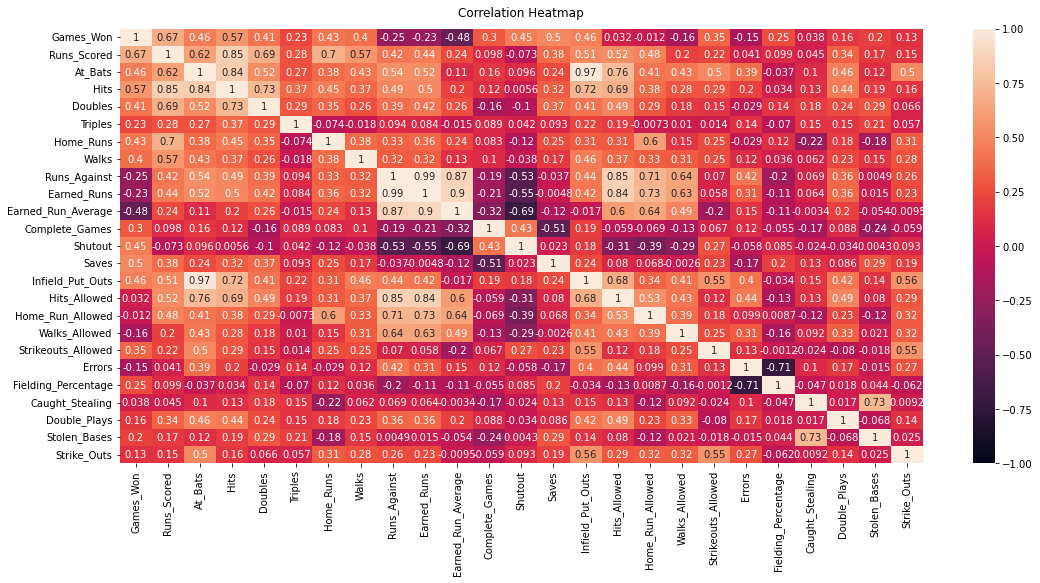

In [ ]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_period3.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
df_period3.corr()['Games_Won'].sort_values(ascending=False)

Games_Won              1.000000
Runs_Scored            0.672123
Hits                   0.573141
Saves                  0.502047
Infield_Put_Outs       0.464001
At_Bats                0.455421
Shutout                0.451290
Home_Runs              0.429573
Doubles                0.407826
Walks                  0.397121
Strikeouts_Allowed     0.347724
Complete_Games         0.299950
Fielding_Percentage    0.250331
Triples                0.226863
Stolen_Bases           0.196922
Double_Plays           0.158119
Strike_Outs            0.134474
Caught_Stealing        0.038369
Hits_Allowed           0.032424
Home_Run_Allowed      -0.011753
Errors                -0.148223
Walks_Allowed         -0.164312
Earned_Runs           -0.227279
Runs_Against          -0.249366
Earned_Run_Average    -0.476491
Name: Games_Won, dtype: float64

In [ ]:
df_period3.corr()

Games_Won  Runs_Scored   At_Bats      Hits   Doubles  \
Games_Won             1.000000     0.672123  0.455421  0.573141  0.407826   
Runs_Scored           0.672123     1.000000  0.619035  0.845862  0.694609   
At_Bats               0.455421     0.619035  1.000000  0.835225  0.523000   
Hits                  0.573141     0.845862  0.835225  1.000000  0.730266   
Doubles               0.407826     0.694609  0.523000  0.730266  1.000000   
Triples               0.226863     0.280874  0.270323  0.372716  0.288251   
Home_Runs             0.429573     0.703117  0.380455  0.448034  0.347470   
Walks                 0.397121     0.566696  0.429349  0.366245  0.260824   
Runs_Against         -0.249366     0.421630  0.538682  0.492757  0.388402   
Earned_Runs          -0.227279     0.444967  0.524549  0.501698  0.419189   
Earned_Run_Average   -0.476491     0.240734  0.106514  0.202540  0.259897   
Complete_Games        0.299950     0.098488  0.159731  0.120551 -0.155735   
Shutout               0.451290    -0.073375  0.095563  0.005570 -0.104484   
Saves                 0.502047     0.378181  0.244755  0.315393  0.370840   
Infield_Put_Outs      0.464001     0.512705  0.974558  0.721549  0.414472   
Hits_Allowed          0.032424     0.523484  0.756890  0.687789  0.491138   
Home_Run_Allowed     -0.011753     0.484276  0.414365  0.377021  0.287163   
Walks_Allowed        -0.164312     0.201727  0.430787  0.282592  0.175487   
Strikeouts_Allowed    0.347724     0.221284  0.501812  0.285453  0.153588   
Errors               -0.148223     0.041086  0.392935  0.204308 -0.028679   
Fielding_Percentage   0.250331     0.099210 -0.037279  0.033945  0.140644   
Caught_Stealing       0.038369     0.044879  0.104901  0.129051  0.183430   
Double_Plays          0.158119     0.339798  0.461389  0.443152  0.244274   
Stolen_Bases          0.196922     0.174073  0.117651  0.187340  0.286334   
Strike_Outs           0.134474     0.145921  0.500950  0.157340  0.065804   

                      Triples  Home_Runs     Walks  Runs_Against  Earned_Runs  \
Games_Won            0.226863   0.429573  0.397121     -0.249366    -0.227279   
Runs_Scored          0.280874   0.703117  0.566696      0.421630     0.444967   
At_Bats              0.270323   0.380455  0.429349      0.538682     0.524549   
Hits                 0.372716   0.448034  0.366245      0.492757     0.501698   
Doubles              0.288251   0.347470  0.260824      0.388402     0.419189   
Triples              1.000000  -0.073586 -0.017646      0.094273     0.084283   
Home_Runs           -0.073586   1.000000  0.380768      0.333823     0.355796   
Walks               -0.017646   0.380768  1.000000      0.320110     0.321842   
Runs_Against         0.094273   0.333823  0.320110      1.000000     0.986538   
Earned_Runs          0.084283   0.355796  0.321842      0.986538     1.000000   
Earned_Run_Average  -0.015071   0.240477  0.129724      0.873855     0.897558   
Complete_Games       0.089289   0.082906  0.102880     -0.190984    -0.212599   
Shutout              0.041925  -0.115052 -0.037712     -0.532446    -0.546602   
Saves                0.092524   0.254163  0.169069     -0.036604    -0.004829   
Infield_Put_Outs     0.221119   0.309853  0.460318      0.442859     0.423690   
Hits_Allowed         0.187392   0.311048  0.373468      0.852368     0.844243   
Home_Run_Allowed    -0.007283   0.602282  0.327254      0.705855     0.726508   
Walks_Allowed        0.010009   0.153323  0.314687      0.639845     0.626290   
Strikeouts_Allowed   0.014333   0.251257  0.251655      0.070173     0.057804   
Errors               0.135862  -0.029295  0.116536      0.420491     0.306638   
Fielding_Percentage -0.070435   0.118354  0.036122     -0.195322    -0.108387   
Caught_Stealing      0.150808  -0.224162  0.061569      0.069154     0.063784   
Double_Plays         0.152796   0.184338  0.230048      0.358468     0.363701   
Stolen_Bases         0.207198  -0.179154  0.149535      0.004930     0.014

In [ ]:
df_p3_off = pd.DataFrame(df_baseball[(df_baseball['Year ']>=1960) & (df_baseball['Year ']<=1990)], columns = ['Games_Won', 'Runs_Scored','At_Bats','Hits','Doubles','Triples','Home_Runs','Walks','Caught_Stealing','Stolen_Bases','Strike_Outs'])
df_p3_off.corr()['Games_Won'].sort_values(ascending=False)

Games_Won          1.000000
Runs_Scored        0.672123
Hits               0.573141
At_Bats            0.455421
Home_Runs          0.429573
Doubles            0.407826
Walks              0.397121
Triples            0.226863
Stolen_Bases       0.196922
Strike_Outs        0.134474
Caught_Stealing    0.038369
Name: Games_Won, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

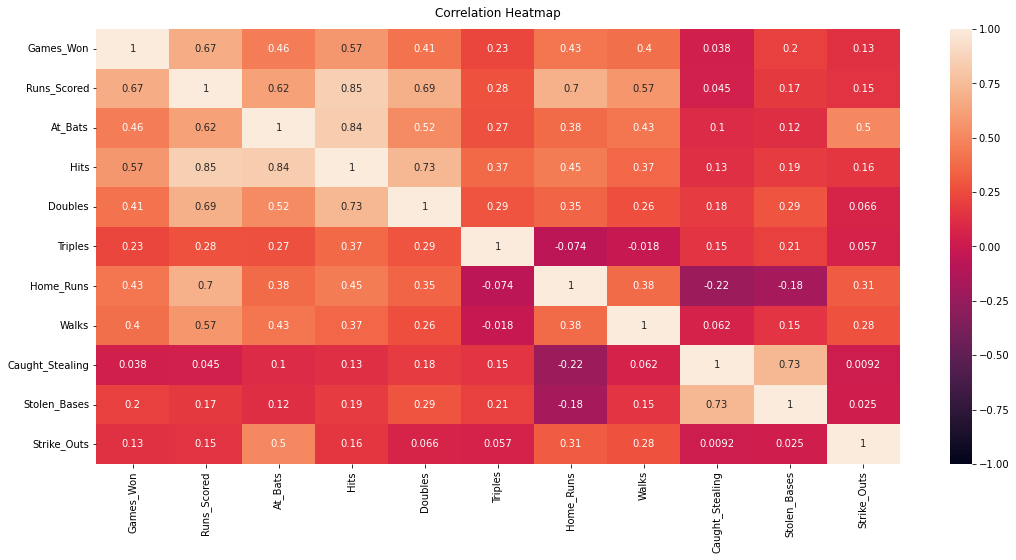

In [ ]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_p3_off.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
x_trainp3, x_testp3, y_trainp3, y_testp3 = train_test_split(df_p3_off, df_p3_off['Games_Won'],test_size=0.3, random_state=0)

#### Calculate descriptive statistics for the training data set

In [ ]:
x_trainp3.describe()

Games_Won  Runs_Scored      At_Bats         Hits     Doubles  \
count  511.000000   511.000000   511.000000   511.000000  511.000000   
mean    79.978474   668.197652  5425.397260  1385.309198  225.272016   
std     12.300547    91.572911   337.304158   119.112676   34.188554   
min     41.000000   348.000000  3493.000000   868.000000  133.000000   
25%     72.000000   616.000000  5419.000000  1328.500000  203.000000   
50%     81.000000   673.000000  5489.000000  1397.000000  224.000000   
75%     89.000000   730.000000  5545.000000  1459.000000  248.000000   
max    109.000000   896.000000  5767.000000  1633.000000  326.000000   

          Triples   Home_Runs       Walks  Caught_Stealing  Stolen_Bases  \
count  511.000000  511.000000  511.000000       511.000000    511.000000   
mean    36.919765  125.982387  515.636008        52.307241     99.710372   
std     11.183120   34.220646   73.784640        17.792307     48.437166   
min     11.000000   32.000000  295.000000        11.000000     16.000000   
25%     29.000000  102.000000  469.500000        39.500000     64.000000   
50%     35.000000  125.000000  513.000000        51.000000     91.000000   
75%     43.500000  148.000000  563.000000        62.000000    131.000000   
max     79.000000  240.000000  729.000000       123.000000    341.000000   

       Strike_Outs  
count   511.000000  
mean    862.168297  
std     122.489964  
min     379.000000  
25%     801.000000  
50%     870.000000  
75%     939.500000  
max    1203.000000

#### Calculate descriptive statistics for the test data set

In [ ]:
x_testp3.describe()

Games_Won  Runs_Scored      At_Bats         Hits     Doubles  \
count  219.000000   219.000000   219.000000   219.000000  219.000000   
mean    78.849315   661.739726  5388.091324  1373.831050  225.342466   
std     13.297242    94.137616   407.137232   135.892476   33.554236   
min     37.000000   329.000000  3521.000000   797.000000  119.000000   
25%     70.000000   608.000000  5398.500000  1333.500000  203.000000   
50%     81.000000   676.000000  5489.000000  1397.000000  225.000000   
75%     87.500000   723.500000  5540.500000  1451.000000  251.000000   
max    109.000000   891.000000  5733.000000  1620.000000  298.000000   

          Triples   Home_Runs       Walks  Caught_Stealing  Stolen_Bases  \
count  219.000000  219.000000  219.000000       219.000000    219.000000   
mean    37.114155  126.000000  512.977169        52.200913     98.410959   
std     10.013327   37.169954   73.364582        16.732263     43.371079   
min     16.000000   47.000000  275.000000        11.000000     18.000000   
25%     29.500000   99.000000  473.500000        42.500000     66.000000   
50%     36.000000  124.000000  516.000000        52.000000     95.000000   
75%     44.000000  149.500000  562.500000        62.000000    125.500000   
max     68.000000  221.000000  684.000000       112.000000    262.000000   

       Strike_Outs  
count   219.000000  
mean    856.671233  
std     131.407873  
min     434.000000  
25%     792.500000  
50%     864.000000  
75%     945.500000  
max    1154.000000

In [ ]:
lm1_p3_Offense = smf.ols(formula="Games_Won ~ Runs_Scored", data=x_trainp3).fit()
lm1_p3_Offense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     421.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           1.22e-68
Time:                        18:40:15   Log-Likelihood:                -1853.0
No. Observations:                 511   AIC:                             3710.
Df Residuals:                     509   BIC:                             3718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.5839      2.970      6.593      0.000      13.748      25.420
Runs_Scored     0.0904      0.004     20.521      0.000       0.082       0.099
==============================================================================
Omnibus:                        6.703   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.852
Skew:                          -0.107   Prob(JB):                       0.0884
Kurtosis:                       2.574   Cond. No.                     4.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R Squared is Low. Will try adding Hits.

In [ ]:
lm2_p3_Offense = smf.ols(formula="Games_Won ~ Runs_Scored+Hits", data=x_trainp3).fit()
lm2_p3_Offense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           2.06e-67
Time:                        18:40:15   Log-Likelihood:                -1852.5
No. Observations:                 511   AIC:                             3711.
Df Residuals:                     508   BIC:                             3724.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.8289      5.060      3.128      0.002       5.887      25.770
Runs_Scored     0.0841      0.008     10.328      0.000       0.068       0.100
Hits            0.0057      0.006      0.917      0.360      -0.007       0.018
==============================================================================
Omnibus:                        6.578   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                4.732
Skew:                          -0.101   Prob(JB):                       0.0938
Kurtosis:                       2.574   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R squared adjusted did not really get better. Hits is already highly correlated with Runs Scored and P-value is insignificant. Will remove Hits and add At Bats.

In [ ]:
lm3_p3_Offense = smf.ols(formula="Games_Won ~ Runs_Scored+At_Bats", data=x_trainp3).fit()
lm3_p3_Offense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     213.7
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           4.55e-68
Time:                        18:40:15   Log-Likelihood:                -1851.0
No. Observations:                 511   AIC:                             3708.
Df Residuals:                     508   BIC:                             3721.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.0293      6.574      1.221      0.223      -4.886      20.945
Runs_Scored     0.0841      0.005     15.443      0.000       0.073       0.095
At_Bats         0.0029      0.001      1.969      0.050    6.22e-06       0.006
==============================================================================
Omnibus:                        6.921   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                5.238
Skew:                          -0.135   Prob(JB):                       0.0729
Kurtosis:                       2.583   Cond. No.                     8.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R Squared is slightly better. At Bats is right at 0.05. Will keep At Bats for now and will add Home Runs

In [ ]:
lm5_p3_Offense = smf.ols(formula="Games_Won ~ Runs_Scored+At_Bats+Home_Runs", data=x_trainp3).fit()
lm5_p3_Offense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     144.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           1.55e-67
Time:                        18:40:15   Log-Likelihood:                -1849.4
No. Observations:                 511   AIC:                             3707.
Df Residuals:                     507   BIC:                             3724.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.2325      6.575      1.100      0.272      -5.685      20.150
Runs_Scored     0.0921      0.007     13.040      0.000       0.078       0.106
At_Bats         0.0027      0.001      1.859      0.064      -0.000       0.006
Home_Runs      -0.0294      0.016     -1.782      0.075      -0.062       0.003
==============================================================================
Omnibus:                        6.778   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.823
Skew:                          -0.100   Prob(JB):                       0.0897
Kurtosis:                       2.568   Cond. No.                     8.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Home Runs and At Bats p value is over 0.05. Will remove Home Runs and At Bats and add Doubles

In [ ]:
lm6_p3_Offense = smf.ols(formula="Games_Won ~ Runs_Scored+Doubles", data=x_trainp3).fit()
lm6_p3_Offense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     216.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           1.24e-68
Time:                        18:40:15   Log-Likelihood:                -1849.7
No. Observations:                 511   AIC:                             3705.
Df Residuals:                     508   BIC:                             3718.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.8393      3.084      7.081      0.000      15.780      27.898
Runs_Scored     0.1008      0.006     16.827      0.000       0.089       0.113
Doubles        -0.0409      0.016     -2.550      0.011      -0.072      -0.009
==============================================================================
Omnibus:                        7.219   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                5.530
Skew:                          -0.147   Prob(JB):                       0.0630
Kurtosis:                       2.583   Cond. No.                     5.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm7_p3_Offense = smf.ols(formula="Games_Won ~ Runs_Scored+Doubles+Walks", data=x_train).fit()
lm7_p3_Offense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     279.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.94e-105
Time:                        18:40:15   Log-Likelihood:                -1990.5
No. Observations:                 492   AIC:                             3989.
Df Residuals:                     488   BIC:                             4006.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.7860      2.290      2.526      0.012       1.286      10.286
Runs_Scored     0.0221      0.005      4.180      0.000       0.012       0.033
Doubles         0.1653      0.021      7.806      0.000       0.124       0.207
Walks           0.0487      0.006      8.329      0.000       0.037       0.060
==============================================================================
Omnibus:                        9.320   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.697
Skew:                          -0.279   Prob(JB):                      0.00784
Kurtosis:                       3.401   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R-squared did not change and Walks P-value is over 0.05. Will remove Walks and add Stolen Basis.

In [ ]:
lm8_p3_Offense = smf.ols(formula="Games_Won ~ Runs_Scored+Doubles+Stolen_Bases", data=x_trainp3).fit()
lm8_p3_Offense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           8.35e-70
Time:                        18:40:16   Log-Likelihood:                -1844.2
No. Observations:                 511   AIC:                             3696.
Df Residuals:                     507   BIC:                             3713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.3065      3.058      6.968      0.000      15.299      27.314
Runs_Scored      0.1012      0.006     17.056      0.000       0.090       0.113
Doubles         -0.0523      0.016     -3.217      0.001      -0.084      -0.020
Stolen_Bases     0.0284      0.009      3.341      0.001       0.012       0.045
==============================================================================
Omnibus:                        7.219   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                5.429
Skew:                          -0.138   Prob(JB):                       0.0662
Kurtosis:                       2.577   Cond. No.                     5.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R-squared is better. Will Add Triples

In [ ]:
lm9_p3_Offense = smf.ols(formula="Games_Won ~ Runs_Scored+Doubles+Stolen_Bases+Triples", data=x_trainp3).fit()
lm9_p3_Offense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           7.73e-69
Time:                        18:40:16   Log-Likelihood:                -1843.8
No. Observations:                 511   AIC:                             3698.
Df Residuals:                     506   BIC:                             3719.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.0454      3.074      6.847      0.000      15.007      27.084
Runs_Scored      0.1003      0.006     16.661      0.000       0.088       0.112
Doubles         -0.0535      0.016     -3.279      0.001      -0.086      -0.021
Stolen_Bases     0.0276      0.009      3.224      0.001       0.011       0.044
Triples          0.0326      0.038      0.859      0.391      -0.042       0.107
==============================================================================
Omnibus:                        6.643   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                5.065
Skew:                          -0.132   Prob(JB):                       0.0795
Kurtosis:                       2.590   Cond. No.                     5.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Triples P-value is over 0.05. Will remove Triples and add Caught Stealing

In [ ]:
lm10_p3_Offense = smf.ols(formula="Games_Won ~ Runs_Scored+Doubles+Stolen_Bases+Caught_Stealing", data=x_trainp3).fit()
lm10_p3_Offense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           1.04e-69
Time:                        18:40:16   Log-Likelihood:                -1841.7
No. Observations:                 511   AIC:                             3693.
Df Residuals:                     506   BIC:                             3715.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.0275      3.290      7.302      0.000      17.563      30.492
Runs_Scored         0.0988      0.006     16.451      0.000       0.087       0.111
Doubles            -0.0492      0.016     -3.027      0.003      -0.081      -0.017
Stolen_Bases        0.0491      0.013      3.868      0.000       0.024       0.074
Caught_Stealing    -0.0746      0.034     -2.189      0.029      -0.142      -0.008
==============================================================================
Omnibus:                        6.134   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.029
Skew:                          -0.153   Prob(JB):                       0.0809
Kurtosis:                       2.622   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### So far the best High Offensive combination is Runs_Scored, Doubles, Stolen_Bases, Caught_Stealing (lm10_p3_Offense)

In [ ]:
lm10_p3_Offense_pred=lm10_p3_Offense.predict(x_testp3)

In [ ]:
predict_values_Off=pd.concat([x_testp3["Games_Won"],lm10_p3_Offense_pred],axis=1)
predict_values_Off.columns=["actual_Games_Won","predicted_Games_Won"]
predict_values_Off["residual"]=predict_values_Off["actual_Games_Won"]-predict_values_Off["predicted_Games_Won"]

In [ ]:
mae_Off=metrics.mean_absolute_error(predict_values_Off['actual_Games_Won'], predict_values_Off['predicted_Games_Won'])
mse_Off=metrics.mean_squared_error(predict_values_Off['actual_Games_Won'], predict_values_Off['predicted_Games_Won'])
rmse_Off=np.sqrt(metrics.mean_squared_error(predict_values_Off['actual_Games_Won'], predict_values_Off['predicted_Games_Won']))

In [ ]:
predict_values_Off.head()

actual_Games_Won  predicted_Games_Won   residual
1539                87            72.232800  14.767200
1530                52            70.284319 -18.284319
1357                86            76.449381   9.550619
1374                85            89.501595  -4.501595
1733                94            88.014511   5.985489

In [ ]:
print ('mean absolute error', mae_Off)

mean absolute error 7.747331707701051


In [ ]:
print ('mean squared error', mse_Off)

mean squared error 94.0168727941441


In [ ]:
print ('root mean squared error', rmse_Off)

root mean squared error 9.69622982370695


### Tight Defenses Variables

In [ ]:
df_p3_def = pd.DataFrame(df_baseball[(df_baseball['Year ']>=1960) & (df_baseball['Year ']<=1990)], columns = ['Games_Won','Runs_Against','Earned_Runs','Earned_Run_Average','Complete_Games','Shutout','Saves','Infield_Put_Outs','Hits_Allowed','Home_Run_Allowed', 'Walks_Allowed','Strikeouts_Allowed','Errors','Fielding_Percentage','Double_Plays'])

In [ ]:
df_p3_def.corr()['Games_Won'].sort_values(ascending=False)

Games_Won              1.000000
Saves                  0.502047
Infield_Put_Outs       0.464001
Shutout                0.451290
Strikeouts_Allowed     0.347724
Complete_Games         0.299950
Fielding_Percentage    0.250331
Double_Plays           0.158119
Hits_Allowed           0.032424
Home_Run_Allowed      -0.011753
Errors                -0.148223
Walks_Allowed         -0.164312
Earned_Runs           -0.227279
Runs_Against          -0.249366
Earned_Run_Average    -0.476491
Name: Games_Won, dtype: float64

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(df_p3_def, df_p3_def['Games_Won'],test_size=0.3, random_state=0)

#### Calculate descriptive statistics for the training data set

In [ ]:
x2_train.describe()

Games_Won  Runs_Against  Earned_Runs  Earned_Run_Average  \
count  511.000000    511.000000   511.000000          511.000000   
mean    79.978474    667.221135   591.772994            3.718669   
std     12.300547     87.987120    80.698321            0.463291   
min     41.000000    331.000000   293.000000            2.450000   
25%     72.000000    612.000000   539.000000            3.370000   
50%     81.000000    671.000000   595.000000            3.710000   
75%     89.000000    725.000000   646.500000            4.040000   
max    109.000000    957.000000   834.000000            5.280000   

       Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  \
count      511.000000  511.000000  511.000000        511.000000    511.000000   
mean        33.958904   11.203523   33.571429       4297.667319   1385.874755   
std         14.219025    4.409623    9.099789        260.656695    116.707595   
min          6.000000    1.000000   12.000000       2767.000000    840.000000   
25%         23.000000    8.000000   27.000000       4306.500000   1337.500000   
50%         33.000000   11.000000   33.000000       4350.000000   1402.000000   
75%         44.000000   14.000000   41.000000       4383.000000   1455.000000   
max         94.000000   28.000000   64.000000       4518.000000   1636.000000   

       Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  \
count        511.000000     511.000000          511.000000  511.000000   
mean         126.759295     511.919765          863.792564  136.078278   
std           28.211366      74.486500          128.969840   21.800471   
min           40.000000     268.000000          404.000000   65.000000   
25%          108.000000     468.000000          784.000000  122.000000   
50%          126.000000     507.000000          870.000000  137.000000   
75%          143.000000     560.000000          941.000000  150.000000   
max          226.000000     770.000000         1221.000000  192.000000   

       Fielding_Percentage  Double_Plays  
count           511.000000    511.000000  
mean              0.973209    149.031311  
std               0.004756     20.367000  
min               0.960000     81.000000  
25%               0.970000    136.000000  
50%               0.970000    150.000000  
75%               0.980000    162.000000  
max               0.980000    215.000000

In [ ]:
x2_test.describe()

Games_Won  Runs_Against  Earned_Runs  Earned_Run_Average  \
count  219.000000    219.000000   219.000000          219.000000   
mean    78.849315    664.018265   588.484018            3.723014   
std     13.297242    101.040003    90.319380            0.503243   
min     37.000000    343.000000   305.000000            2.490000   
25%     70.000000    610.000000   533.500000            3.400000   
50%     81.000000    669.000000   593.000000            3.720000   
75%     87.500000    727.000000   653.000000            4.060000   
max    109.000000    948.000000   801.000000            5.040000   

       Complete_Games     Shutout       Saves  Infield_Put_Outs  Hits_Allowed  \
count      219.000000  219.000000  219.000000        219.000000    219.000000   
mean        34.324201   10.812785   32.210046       4268.063927   1372.694064   
std         14.211376    4.824120   10.262682        310.154572    137.651776   
min          6.000000    2.000000   10.000000       2826.000000    827.000000   
25%         24.000000    7.000000   25.000000       4294.500000   1318.000000   
50%         35.000000   10.000000   31.000000       4338.000000   1396.000000   
75%         44.000000   14.000000   39.000000       4378.500000   1459.000000   
max         70.000000   30.000000   68.000000       4479.000000   1593.000000   

       Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed      Errors  \
count        219.000000     219.000000          219.000000  219.000000   
mean         124.187215     521.648402          852.881279  134.333333   
std           29.603444      77.942049          138.009089   22.281834   
min           52.000000     287.000000          388.000000   72.000000   
25%          101.000000     476.500000          773.500000  121.000000   
50%          125.000000     519.000000          863.000000  133.000000   
75%          146.500000     572.000000          935.000000  146.500000   
max          199.000000     760.000000         1217.000000  210.000000   

       Fielding_Percentage  Double_Plays  
count           219.000000    219.000000  
mean              0.973333    148.689498  
std               0.005008     19.941070  
min               0.960000     74.000000  
25%               0.970000    137.000000  
50%               0.970000    149.000000  
75%               0.980000    162.000000  
max               0.980000    192.000000

In [ ]:
lm1_p3_defense = smf.ols(formula="Games_Won ~ Saves", data=x2_train).fit()
lm1_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     159.7
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           4.96e-32
Time:                        18:40:16   Log-Likelihood:                -1937.3
No. Observations:                 511   AIC:                             3879.
Df Residuals:                     509   BIC:                             3887.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.8017      1.818     31.793      0.000      54.230      61.374
Saves          0.6606      0.052     12.637      0.000       0.558       0.763
==============================================================================
Omnibus:                        2.581   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.189
Skew:                           0.043   Prob(JB):                        0.335
Kurtosis:                       2.691   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R Squared is very low. Will add Infield_Put_Outs 

In [ ]:
lm2_p3_defense = smf.ols(formula="Games_Won ~ Saves+Infield_Put_Outs", data=x2_train).fit()
lm2_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     137.5
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           1.88e-48
Time:                        18:40:16   Log-Likelihood:                -1896.5
No. Observations:                 511   AIC:                             3799.
Df Residuals:                     508   BIC:                             3812.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -8.4968      7.264     -1.170      0.243     -22.768       5.775
Saves                0.5426      0.050     10.869      0.000       0.445       0.641
Infield_Put_Outs     0.0163      0.002      9.381      0.000       0.013       0.020
==============================================================================
Omnibus:                       12.412   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.307
Skew:                           0.107   Prob(JB):                       0.0259
Kurtosis:                       2.455   Cond. No.                     7.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R Squared is better but still low. Will add Earned_Run_Average 

In [ ]:
lm3_p3_defense = smf.ols(formula="Games_Won ~ Saves+Infield_Put_Outs+Earned_Run_Average", data=x2_train).fit()
lm3_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     183.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           2.06e-80
Time:                        18:40:17   Log-Likelihood:                -1819.5
No. Observations:                 511   AIC:                             3647.
Df Residuals:                     507   BIC:                             3664.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             34.2306      7.026      4.872      0.000      20.427      48.034
Saves                  0.4812      0.043     11.132      0.000       0.396       0.566
Infield_Put_Outs       0.0164      0.002     10.917      0.000       0.013       0.019
Earned_Run_Average   -10.9730      0.822    -13.351      0.000     -12.588      -9.358
==============================================================================
Omnibus:                        1.718   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.805
Skew:                           0.126   Prob(JB):                        0.405
Kurtosis:                       2.856   Cond. No.                     8.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R-Squared is better. Will add Shutout

In [ ]:
lm4_p3_defense = smf.ols(formula="Games_Won ~ Saves+Infield_Put_Outs+Earned_Run_Average+Shutout", data=x2_train).fit()
lm4_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           3.25e-82
Time:                        18:40:17   Log-Likelihood:                -1812.6
No. Observations:                 511   AIC:                             3635.
Df Residuals:                     506   BIC:                             3656.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             24.0337      7.457      3.223      0.001       9.383      38.684
Saves                  0.5069      0.043     11.723      0.000       0.422       0.592
Infield_Put_Outs       0.0149      0.002      9.686      0.000       0.012       0.018
Earned_Run_Average    -8.0680      1.125     -7.173      0.000     -10.278      -5.858
Shutout                0.4465      0.120      3.730      0.000       0.211       0.682
==============================================================================
Omnibus:                        2.411   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                2.492
Skew:                           0.155   Prob(JB):                        0.288
Kurtosis:                       2.853   Cond. No.                     8.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm5_p3_defense = smf.ols(formula="Games_Won ~ Saves+Infield_Put_Outs+Earned_Run_Average+Shutout+Strikeouts_Allowed", data=x2_train).fit()
lm5_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           1.49e-81
Time:                        18:40:17   Log-Likelihood:                -1811.5
No. Observations:                 511   AIC:                             3635.
Df Residuals:                     505   BIC:                             3660.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.4774      7.459      3.147      0.002       8.822      38.132
Saves                  0.5128      0.043     11.819      0.000       0.428       0.598
Infield_Put_Outs       0.0161      0.002      9.169      0.000       0.013       0.020
Earned_Run_Average    -8.2542      1.131     -7.298      0.000     -10.476      -6.032
Shutout                0.4603      0.120      3.837      0.000       0.225       0.696
Strikeouts_Allowed    -0.0051      0.004     -1.439      0.151      -0.012       0.002
==============================================================================
Omnibus:                        1.840   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.924
Skew:                           0.128   Prob(JB):                        0.382
Kurtosis:                       2.844   Cond. No.                     8.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Strikeouts Allowed P-value is over 0.05. Will remove and add Complete_Games

In [ ]:
lm6_p3_defense = smf.ols(formula="Games_Won ~ Saves+Infield_Put_Outs+Earned_Run_Average+Shutout+Complete_Games", data=x2_train).fit()
lm6_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     246.9
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          4.35e-133
Time:                        18:40:17   Log-Likelihood:                -1691.0
No. Observations:                 511   AIC:                             3394.
Df Residuals:                     505   BIC:                             3419.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.5885      5.914      2.298      0.022       1.969      25.208
Saves                  1.0258      0.045     22.715      0.000       0.937       1.115
Infield_Put_Outs       0.0065      0.001      5.010      0.000       0.004       0.009
Earned_Run_Average    -4.1265      0.916     -4.507      0.000      -5.925      -2.328
Shutout                0.1044      0.096      1.082      0.280      -0.085       0.294
Complete_Games         0.5329      0.030     17.539      0.000       0.473       0.593
==============================================================================
Omnibus:                       13.441   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.785
Skew:                           0.328   Prob(JB):                     0.000616
Kurtosis:                       3.513   Cond. No.                     8.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R Squared is better but now Shutout P-value is over 0.05. Will remove Shutout

In [ ]:
lm7_p3_defense = smf.ols(formula="Games_Won ~ Saves+Infield_Put_Outs+Earned_Run_Average+Complete_Games", data=x2_train).fit()
lm7_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     308.2
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          4.17e-134
Time:                        18:40:17   Log-Likelihood:                -1691.6
No. Observations:                 511   AIC:                             3393.
Df Residuals:                     506   BIC:                             3414.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             15.7448      5.570      2.827      0.005       4.802      26.688
Saves                  1.0265      0.045     22.729      0.000       0.938       1.115
Infield_Put_Outs       0.0068      0.001      5.261      0.000       0.004       0.009
Earned_Run_Average    -4.7288      0.727     -6.502      0.000      -6.158      -3.300
Complete_Games         0.5395      0.030     18.130      0.000       0.481       0.598
==============================================================================
Omnibus:                       13.212   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.457
Skew:                           0.327   Prob(JB):                     0.000726
Kurtosis:                       3.502   Cond. No.                     8.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Adding Fielding_Percentage

In [ ]:
lm8_p3_defense = smf.ols(formula="Games_Won ~ Saves+Infield_Put_Outs+Earned_Run_Average+Complete_Games+Fielding_Percentage", data=x2_train).fit()
lm8_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     258.5
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.13e-136
Time:                        18:40:17   Log-Likelihood:                -1682.6
No. Observations:                 511   AIC:                             3377.
Df Residuals:                     505   BIC:                             3403.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -242.7704     61.111     -3.973      0.000    -362.833    -122.708
Saves                   0.9966      0.045     22.157      0.000       0.908       1.085
Infield_Put_Outs        0.0072      0.001      5.696      0.000       0.005       0.010
Earned_Run_Average     -4.6113      0.716     -6.441      0.000      -6.018      -3.205
Complete_Games          0.5343      0.029     18.239      0.000       0.477       0.592
Fielding_Percentage   264.3382     62.236      4.247      0.000     142.065     386.611
==============================================================================
Omnibus:                       12.139   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.750
Skew:                           0.292   Prob(JB):                      0.00103
Kurtosis:                       3.553   Cond. No.                     1.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Adding Runs_Against

In [ ]:
lm9_p3_defense = smf.ols(formula="Games_Won ~ Saves+Infield_Put_Outs+Earned_Run_Average+Complete_Games+Fielding_Percentage+Runs_Against", data=x2_train).fit()
lm9_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     220.7
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.69e-137
Time:                        18:40:17   Log-Likelihood:                -1677.8
No. Observations:                 511   AIC:                             3370.
Df Residuals:                     504   BIC:                             3399.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -181.8202     63.720     -2.853      0.005    -307.010     -56.630
Saves                   0.9694      0.045     21.325      0.000       0.880       1.059
Infield_Put_Outs        0.0180      0.004      4.855      0.000       0.011       0.025
Earned_Run_Average      6.9384      3.800      1.826      0.068      -0.527      14.404
Complete_Games          0.5239      0.029     17.914      0.000       0.466       0.581
Fielding_Percentage   158.9837     70.485      2.256      0.025      20.503     297.465
Runs_Against           -0.0698      0.023     -3.094      0.002      -0.114      -0.025
==============================================================================
Omnibus:                       10.773   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.304
Skew:                           0.262   Prob(JB):                      0.00213
Kurtosis:                       3.550   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Earned Run Average p value is over 0.05. Will remove

In [ ]:
lm10_p3_defense = smf.ols(formula="Games_Won ~ Saves+Infield_Put_Outs+Complete_Games+Fielding_Percentage+Runs_Against", data=x2_train).fit()
lm10_p3_defense.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     262.9
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          5.19e-138
Time:                        18:40:17   Log-Likelihood:                -1679.5
No. Observations:                 511   AIC:                             3371.
Df Residuals:                     505   BIC:                             3396.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -215.4715     61.138     -3.524      0.000    -335.587     -95.356
Saves                   0.9795      0.045     21.657      0.000       0.891       1.068
Infield_Put_Outs        0.0119      0.002      7.768      0.000       0.009       0.015
Complete_Games          0.5253      0.029     17.926      0.000       0.468       0.583
Fielding_Percentage   219.2527     62.423      3.512      0.000      96.612     341.894
Runs_Against           -0.0293      0.004     -6.944      0.000      -0.038      -0.021
==============================================================================
Omnibus:                       11.111   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.499
Skew:                           0.275   Prob(JB):                      0.00193
Kurtosis:                       3.533   Cond. No.                     1.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### So far the best tight defense combination lm10_p3_defense

In [ ]:
lm10_p3_defense_pred=lm10_p3_defense.predict(x2_test)

In [ ]:
predict_values_def=pd.concat([x2_test["Games_Won"],lm10_p3_defense_pred],axis=1)
predict_values_def.columns=["actual_Games_Won","predicted_Games_Won"]
predict_values_def["residual"]=predict_values_def["actual_Games_Won"]-predict_values_def["predicted_Games_Won"]

In [ ]:
mae_def=metrics.mean_absolute_error(predict_values_def['actual_Games_Won'], predict_values_def['predicted_Games_Won'])
mse_def=metrics.mean_squared_error(predict_values_def['actual_Games_Won'], predict_values_def['predicted_Games_Won'])
rmse_def=np.sqrt(metrics.mean_squared_error(predict_values_def['actual_Games_Won'], predict_values_def['predicted_Games_Won']))

In [ ]:
predict_values_def.head()

actual_Games_Won  predicted_Games_Won  residual
1539                87            91.821398 -4.821398
1530                52            58.916477 -6.916477
1357                86            76.688592  9.311408
1374                85            77.199220  7.800780
1733                94            88.551389  5.448611

In [ ]:
print ('mean absolute error', mae_def)

mean absolute error 5.531301472404457


In [ ]:
print ('mean squared error', mse_def)

mean squared error 45.351416261796864


In [ ]:
print ('root mean squared error', rmse_def)

root mean squared error 6.734346015894704


### Balance of Two

In [ ]:
x3_train, x3_test, y3_train, y3_test = train_test_split(df_period3, df_period3['Games_Won'],test_size=0.3, random_state=0)

In [ ]:
x3_train.describe()

Games_Won  Runs_Scored      At_Bats         Hits     Doubles  \
count  511.000000   511.000000   511.000000   511.000000  511.000000   
mean    79.978474   668.197652  5425.397260  1385.309198  225.272016   
std     12.300547    91.572911   337.304158   119.112676   34.188554   
min     41.000000   348.000000  3493.000000   868.000000  133.000000   
25%     72.000000   616.000000  5419.000000  1328.500000  203.000000   
50%     81.000000   673.000000  5489.000000  1397.000000  224.000000   
75%     89.000000   730.000000  5545.000000  1459.000000  248.000000   
max    109.000000   896.000000  5767.000000  1633.000000  326.000000   

          Triples   Home_Runs       Walks  Runs_Against  Earned_Runs  ...  \
count  511.000000  511.000000  511.000000    511.000000   511.000000  ...   
mean    36.919765  125.982387  515.636008    667.221135   591.772994  ...   
std     11.183120   34.220646   73.784640     87.987120    80.698321  ...   
min     11.000000   32.000000  295.000000    331.000000   293.000000  ...   
25%     29.000000  102.000000  469.500000    612.000000   539.000000  ...   
50%     35.000000  125.000000  513.000000    671.000000   595.000000  ...   
75%     43.500000  148.000000  563.000000    725.000000   646.500000  ...   
max     79.000000  240.000000  729.000000    957.000000   834.000000  ...   

       Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed  \
count    511.000000        511.000000     511.000000          511.000000   
mean    1385.874755        126.759295     511.919765          863.792564   
std      116.707595         28.211366      74.486500          128.969840   
min      840.000000         40.000000     268.000000          404.000000   
25%     1337.500000        108.000000     468.000000          784.000000   
50%     1402.000000        126.000000     507.000000          870.000000   
75%     1455.000000        143.000000     560.000000          941.000000   
max     1636.000000        226.000000     770.000000         1221.000000   

           Errors  Fielding_Percentage  Caught_Stealing  Double_Plays  \
count  511.000000           511.000000       511.000000    511.000000   
mean   136.078278             0.973209        52.307241    149.031311   
std     21.800471             0.004756        17.792307     20.367000   
min     65.000000             0.960000        11.000000     81.000000   
25%    122.000000             0.970000        39.500000    136.000000   
50%    137.000000             0.970000        51.000000    150.000000   
75%    150.000000             0.980000        62.000000    162.000000   
max    192.000000             0.980000       123.000000    215.000000   

       Stolen_Bases  Strike_Outs  
count    511.000000   511.000000  
mean      99.710372   862.168297  
std       48.437166   122.489964  
min       16.000000   379.000000  
25%       64.000000   801.000000  
50%       91.000000   870.000000  
75%      131.000000   939.500000  
max      341.000000  1203.000000  

[8 rows x 25 columns]

In [ ]:
x3_test.describe()

Games_Won  Runs_Scored      At_Bats         Hits     Doubles  \
count  219.000000   219.000000   219.000000   219.000000  219.000000   
mean    78.849315   661.739726  5388.091324  1373.831050  225.342466   
std     13.297242    94.137616   407.137232   135.892476   33.554236   
min     37.000000   329.000000  3521.000000   797.000000  119.000000   
25%     70.000000   608.000000  5398.500000  1333.500000  203.000000   
50%     81.000000   676.000000  5489.000000  1397.000000  225.000000   
75%     87.500000   723.500000  5540.500000  1451.000000  251.000000   
max    109.000000   891.000000  5733.000000  1620.000000  298.000000   

          Triples   Home_Runs       Walks  Runs_Against  Earned_Runs  ...  \
count  219.000000  219.000000  219.000000    219.000000   219.000000  ...   
mean    37.114155  126.000000  512.977169    664.018265   588.484018  ...   
std     10.013327   37.169954   73.364582    101.040003    90.319380  ...   
min     16.000000   47.000000  275.000000    343.000000   305.000000  ...   
25%     29.500000   99.000000  473.500000    610.000000   533.500000  ...   
50%     36.000000  124.000000  516.000000    669.000000   593.000000  ...   
75%     44.000000  149.500000  562.500000    727.000000   653.000000  ...   
max     68.000000  221.000000  684.000000    948.000000   801.000000  ...   

       Hits_Allowed  Home_Run_Allowed  Walks_Allowed  Strikeouts_Allowed  \
count    219.000000        219.000000     219.000000          219.000000   
mean    1372.694064        124.187215     521.648402          852.881279   
std      137.651776         29.603444      77.942049          138.009089   
min      827.000000         52.000000     287.000000          388.000000   
25%     1318.000000        101.000000     476.500000          773.500000   
50%     1396.000000        125.000000     519.000000          863.000000   
75%     1459.000000        146.500000     572.000000          935.000000   
max     1593.000000        199.000000     760.000000         1217.000000   

           Errors  Fielding_Percentage  Caught_Stealing  Double_Plays  \
count  219.000000           219.000000       219.000000    219.000000   
mean   134.333333             0.973333        52.200913    148.689498   
std     22.281834             0.005008        16.732263     19.941070   
min     72.000000             0.960000        11.000000     74.000000   
25%    121.000000             0.970000        42.500000    137.000000   
50%    133.000000             0.970000        52.000000    149.000000   
75%    146.500000             0.980000        62.000000    162.000000   
max    210.000000             0.980000       112.000000    192.000000   

       Stolen_Bases  Strike_Outs  
count    219.000000   219.000000  
mean      98.410959   856.671233  
std       43.371079   131.407873  
min       18.000000   434.000000  
25%       66.000000   792.500000  
50%       95.000000   864.000000  
75%      125.500000   945.500000  
max      262.000000  1154.000000  

[8 rows x 25 columns]

In [ ]:
lm1_p3_both = smf.ols(formula="Games_Won ~ Runs_Scored+Saves", data=x3_train).fit()
lm1_p3_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     269.4
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           1.74e-80
Time:                        18:40:18   Log-Likelihood:                -1822.3
No. Observations:                 511   AIC:                             3651.
Df Residuals:                     508   BIC:                             3663.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.6603      2.823      5.901      0.000      11.113      22.207
Runs_Scored     0.0764      0.004     16.995      0.000       0.068       0.085
Saves           0.3646      0.045      8.054      0.000       0.276       0.453
==============================================================================
Omnibus:                       10.983   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                6.299
Skew:                           0.051   Prob(JB):                       0.0429
Kurtosis:                       2.466   Cond. No.                     5.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R squared is low. Adding Infield Put outs.

In [ ]:
lm2_p3_both = smf.ols(formula="Games_Won ~ Runs_Scored+Saves+Earned_Run_Average", data=x3_train).fit()
lm2_p3_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1441.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.25e-247
Time:                        18:40:18   Log-Likelihood:                -1431.1
No. Observations:                 511   AIC:                             2870.
Df Residuals:                     507   BIC:                             2887.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.9935      1.779     38.230      0.000      64.499      71.488
Runs_Scored            0.1076      0.002     48.537      0.000       0.103       0.112
Saves                  0.1467      0.022      6.766      0.000       0.104       0.189
Earned_Run_Average   -17.4363      0.407    -42.852      0.000     -18.236     -16.637
==============================================================================
Omnibus:                        0.362   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.405
Skew:                           0.063   Prob(JB):                        0.817
Kurtosis:                       2.945   Cond. No.                     6.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm3_p3_both = smf.ols(formula="Games_Won ~ Runs_Scored+Saves+Earned_Run_Average+Shutout", data=x3_train).fit()
lm3_p3_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1133.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          7.16e-251
Time:                        18:40:18   Log-Likelihood:                -1419.8
No. Observations:                 511   AIC:                             2850.
Df Residuals:                     506   BIC:                             2871.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             59.0756      2.551     23.158      0.000      54.064      64.087
Runs_Scored            0.1056      0.002     47.787      0.000       0.101       0.110
Saves                  0.1637      0.022      7.606      0.000       0.121       0.206
Earned_Run_Average   -15.6203      0.550    -28.384      0.000     -16.701     -14.539
Shutout                0.2608      0.055      4.784      0.000       0.154       0.368
==============================================================================
Omnibus:                        0.452   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.560
Skew:                           0.051   Prob(JB):                        0.756
Kurtosis:                       2.874   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- This model, named "lm3_p3_both", seems to be the best model based on R-Squared and P-values. See below for more in depth evaluation of model for Period 3.

In [ ]:
lm4_p3_both = smf.ols(formula="Games_Won ~ Runs_Scored+Saves+Earned_Run_Average+Shutout+At_Bats", data=x3_train).fit()
lm4_p3_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     904.6
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          2.47e-249
Time:                        18:40:18   Log-Likelihood:                -1419.8
No. Observations:                 511   AIC:                             2852.
Df Residuals:                     505   BIC:                             2877.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             58.4455      3.403     17.173      0.000      51.759      65.132
Runs_Scored            0.1052      0.003     40.806      0.000       0.100       0.110
Saves                  0.1632      0.022      7.555      0.000       0.121       0.206
Earned_Run_Average   -15.6370      0.554    -28.222      0.000     -16.726     -14.548
Shutout                0.2576      0.056      4.614      0.000       0.148       0.367
At_Bats                0.0002      0.001      0.280      0.780      -0.001       0.001
==============================================================================
Omnibus:                        0.453   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.797   Jarque-Bera (JB):                0.558
Skew:                           0.053   Prob(JB):                        0.756
Kurtosis:                       2.877   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### At_Bats P-value is too high and highly correlated with Runs Scored. Will Remove At_Bats and add Infield Put Outs

In [ ]:
lm5_p3_both = smf.ols(formula="Games_Won ~ Runs_Scored+Saves+Earned_Run_Average+Shutout+Infield_Put_Outs", data=x3_train).fit()
lm5_p3_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     908.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.02e-249
Time:                        18:40:18   Log-Likelihood:                -1418.9
No. Observations:                 511   AIC:                             2850.
Df Residuals:                     505   BIC:                             2875.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             55.7535      3.533     15.782      0.000      48.813      62.694
Runs_Scored            0.1043      0.002     43.037      0.000       0.100       0.109
Saves                  0.1612      0.022      7.471      0.000       0.119       0.204
Earned_Run_Average   -15.6401      0.550    -28.434      0.000     -16.721     -14.559
Shutout                0.2454      0.056      4.410      0.000       0.136       0.355
Infield_Put_Outs       0.0011      0.001      1.358      0.175      -0.000       0.003
==============================================================================
Omnibus:                        0.388   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.482
Skew:                           0.055   Prob(JB):                        0.786
Kurtosis:                       2.898   Cond. No.                     8.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Infield Put Outs P-value is too high. Will remove Infield Put Outs.
#### lm3_p3_both seems to have best combination

In [ ]:
lm3_p3_both_pred=lm3_p3_both.predict(x3_test)
lm3_p3_both_pred.describe()

count    219.000000
mean      78.903769
std       12.733198
min       38.143459
25%       70.955000
50%       80.913003
75%       87.565583
max      108.253971
dtype: float64

In [ ]:
predict_values_both=pd.concat([x3_test["Games_Won"],lm3_p3_both_pred],axis=1)
predict_values_both.columns=["actual_Games_Won","predicted_Games_Won"]
predict_values_both["residual"]=predict_values_both["actual_Games_Won"]-predict_values_both["predicted_Games_Won"]

In [ ]:
mae_both=metrics.mean_absolute_error(predict_values_both['actual_Games_Won'], predict_values_both['predicted_Games_Won'])
mse_both=metrics.mean_squared_error(predict_values_both['actual_Games_Won'], predict_values_both['predicted_Games_Won'])
rmse_both=np.sqrt(metrics.mean_squared_error(predict_values_both['actual_Games_Won'], predict_values_both['predicted_Games_Won']))

In [ ]:
print ('mean absolute error', mae_both)

mean absolute error 3.171328961533538


In [ ]:
print ('mean squared error', mse_both)

mean squared error 15.612656389024966


In [ ]:
print ('root mean squared error', rmse_both)

root mean squared error 3.9512854097147887


### Evaluation of Period 3 Model
- This model (lm3_p3_both) has a higher **R-squared** (0.900) than the other models, which means that this model provides a better fit to the data than other previous models.

- Variables were chosen based on the correlation with Games Won. The correlation for each variable was also analyzed to make sure they were not highly correlated with each other.

- The intercept, Runs Scored, Earned Run Average, Shutouts and Saves have significant **p-values**. Thus we reject the null hypothesis (that there is no association between those variables and Games Won) for the intercept, Runs Scored,Earned Run Average, Shutouts and Saves.

- The model has 1 offense variable and 3 defensive variables and due to the coefficients, it tends to lean more on the defensive side. It also has least amount of errors in the predictions.

$y = \beta_0 + \beta_1 \times Runs Scored + \beta_2 \times Shutout + \beta_3 \times Saves + \beta_4 \times Earned Run Average$

$ Games Won = 59.0756 + 0.1056 \times Runs Scored + 0.2608 \times Shutout + 0.1637 \times Saves -15.6203 \times Earned Run Average$


array([[<AxesSubplot:title={'center':'Runs_Scored'}>,
        <AxesSubplot:title={'center':'Earned_Run_Average'}>],
       [<AxesSubplot:title={'center':'Saves'}>,
        <AxesSubplot:title={'center':'Shutout'}>]], dtype=object)

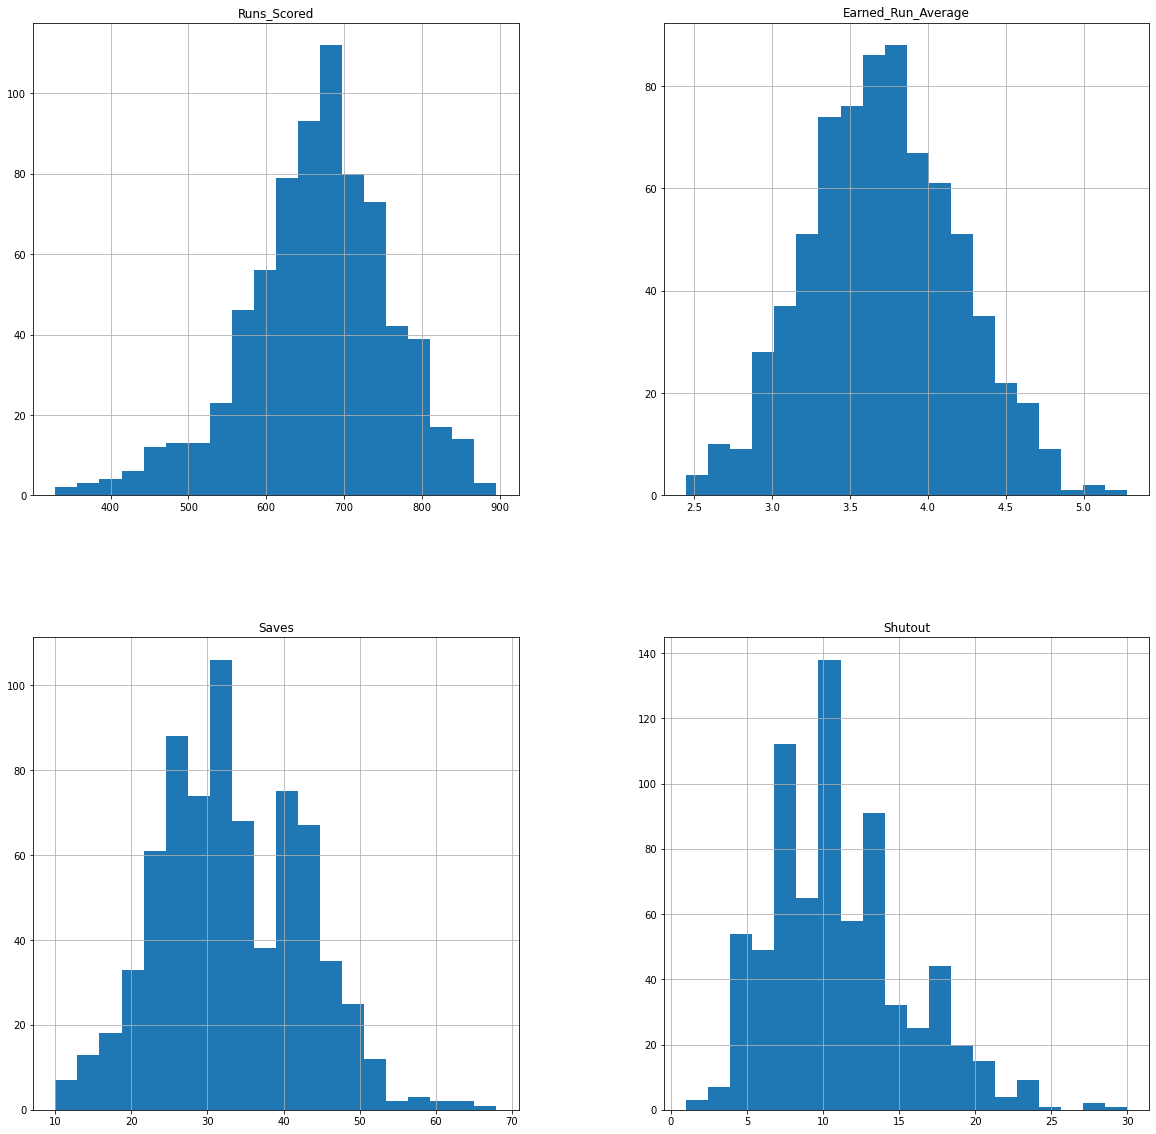

In [ ]:
df2_period3 = pd.DataFrame(df_baseball[(df_baseball['Year ']>=1960) & (df_baseball['Year ']<=1990)], columns = ['Runs_Scored','Earned_Run_Average','Saves','Shutout'])
df2_period3.hist(bins=20)

#### Runs Scored and Earned Run Average are normally distributed. Shutout and Saves are not.

## Period 4: 1990-2010

In [ ]:
df_p4=pd.DataFrame(df_baseball[(df_baseball['Year ']>=1990) & (df_baseball['Year ']<=2010)], columns = ['Games_Won', 'Runs_Scored','At_Bats','Hits','Doubles','Triples','Home_Runs','Walks', 'Runs_Against','Earned_Runs','Earned_Run_Average','Complete_Games','Shutout','Saves','Infield_Put_Outs','Hits_Allowed','Home_Run_Allowed', 'Walks_Allowed','Strikeouts_Allowed','Errors','Fielding_Percentage'])
df_p4
# Create dataframe for period between 1990 and 2010 for offensive and defensive variables

Games_Won  Runs_Scored  At_Bats  Hits  Doubles  Triples  Home_Runs  \
2047         65          682     5504  1376      263       26        162   
2048         76          669     5410  1328      234       22        132   
2049         88          699     5516  1502      298       31        106   
2050         80          690     5570  1448      237       27        147   
2051         94          682     5402  1393      251       44        106   
...         ...          ...      ...   ...      ...      ...        ...   
2650         86          736     5542  1456      285       18        150   
2651         96          802     5439  1343      295       37        160   
2652         90          787     5635  1556      268       25        162   
2653         85          755     5495  1364      319       21        257   
2654         69          655     5418  1355      250       31        149   

      Walks  Runs_Against  Earned_Runs  ...  Complete_Games  Shutout  Saves  \
2047    473           821          727  ...              17        8     30   
2048    660           698          644  ...              10        5     43   
2049    598           664          596  ...              15       13     44   
2050    566           706          612  ...              21       13     42   
2051    478           633          581  ...              17       10     68   
...     ...           ...          ...  ...             ...      ...    ...   
2650    541           641          577  ...               7       16     32   
2651    672           649          611  ...               6       12     51   
2652    511           687          636  ...               7        8     46   
2653    471           728          676  ...               5       11     45   
2654    503           742          658  ...               2        5     37   

      Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  \
2047              4287          1527               128            579   
2048              4305          1445               161            537   
2049              4326          1439                92            519   
2050              4362          1482               106            544   
2051              4347          1313               106            548   
...                ...           ...               ...            ...   
2650              4361          1412               133            477   
2651              4361          1347               175            478   
2652              4366          1355               162            551   
2653              4322          1407               150            539   
2654              4305          1469               151            512   

      Strikeouts_Allowed  Errors  Fielding_Percentage  
2047                 938     158                0.970  
2048                 776      91                0.980  
2049                 997     123                0.980  
2050                 944     140                0.970  
2051                 914     124                0.980  
...                  ...     ...                  ...  
2650                1094      99                0.984  
2651                1189      85                0.986  
2652                1181     105                0.982  
2653                1184      92                0.985  
2654                1068     127                0.979  

[608 rows x 21 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

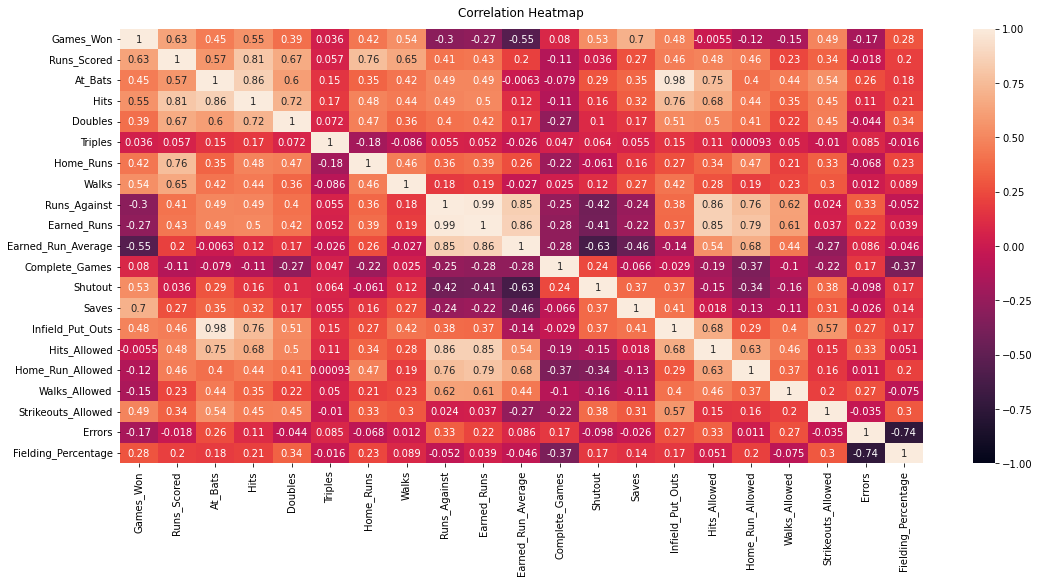

In [ ]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_p4.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
# Gives the Correlation Heatmap for the offensive and defensive variables

In [ ]:
df_p4.corr()['Games_Won'].sort_values(ascending=False)

Games_Won              1.000000
Saves                  0.702968
Runs_Scored            0.627615
Hits                   0.548153
Walks                  0.536093
Shutout                0.526188
Strikeouts_Allowed     0.491782
Infield_Put_Outs       0.482071
At_Bats                0.451233
Home_Runs              0.422444
Doubles                0.391859
Fielding_Percentage    0.282799
Complete_Games         0.080280
Triples                0.035709
Hits_Allowed          -0.005547
Home_Run_Allowed      -0.117280
Walks_Allowed         -0.151105
Errors                -0.165894
Earned_Runs           -0.274627
Runs_Against          -0.298179
Earned_Run_Average    -0.554553
Name: Games_Won, dtype: float64

 - From the correlation heatmap we can observe that:
     - Offensive Variables: Runs_Scored, Hits and Walks has strong positive correlation (>0.5)
     - Defensive Variables: Saves and Shutout has strong positive correlation while Earned_Run_Average has strong negative correlation

 - We will consider the above mentioned variables to build a Regression Model

In [ ]:
x_trainp4, x_testp4, y_trainp4, y_testp4 = train_test_split(df_p4, df_p4['Games_Won'],test_size=0.3, random_state=0)

In [ ]:
lm1p4 = smf.ols(formula="Games_Won ~ Saves+Runs_Scored+Hits+Walks+Shutout+Earned_Run_Average", data=x_trainp4).fit()
lm1p4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     863.8
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          5.24e-232
Time:                        18:40:27   Log-Likelihood:                -1118.3
No. Observations:                 425   AIC:                             2251.
Df Residuals:                     418   BIC:                             2279.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             48.8166      2.832     17.239      0.000      43.250      54.383
Saves                  0.4251      0.027     15.859      0.000       0.372       0.478
Runs_Scored            0.0935      0.004     24.604      0.000       0.086       0.101
Hits                  -0.0084      0.003     -3.266      0.001      -0.013      -0.003
Walks                  0.0024      0.003      0.805      0.421      -0.003       0.008
Shutout                0.3133      0.059      5.316      0.000       0.197       0.429
Earned_Run_Average   -11.0854      0.457    -24.279      0.000     -11.983     -10.188
==============================================================================
Omnibus:                        0.436   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.402
Skew:                          -0.075   Prob(JB):                        0.818
Kurtosis:                       2.995   Cond. No.                     2.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm2p4 = smf.ols(formula="Games_Won ~ Saves+Runs_Scored+Shutout+Earned_Run_Average", data=x_trainp4).fit()
lm2p4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1260.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          2.48e-232
Time:                        18:40:27   Log-Likelihood:                -1124.8
No. Observations:                 425   AIC:                             2260.
Df Residuals:                     420   BIC:                             2280.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             45.3302      2.449     18.511      0.000      40.517      50.144
Saves                  0.4093      0.027     15.419      0.000       0.357       0.461
Runs_Scored            0.0869      0.002     42.731      0.000       0.083       0.091
Shutout                0.2658      0.058      4.585      0.000       0.152       0.380
Earned_Run_Average   -11.3824      0.453    -25.117      0.000     -12.273     -10.492
==============================================================================
Omnibus:                        0.383   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.300
Skew:                          -0.063   Prob(JB):                        0.861
Kurtosis:                       3.030   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm3p4 = smf.ols(formula="Games_Won ~ Saves+Runs_Scored+Earned_Run_Average", data=x_trainp4).fit()
lm3p4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1596.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.62e-229
Time:                        18:40:27   Log-Likelihood:                -1135.2
No. Observations:                 425   AIC:                             2278.
Df Residuals:                     421   BIC:                             2295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             50.9491      2.170     23.481      0.000      46.684      55.214
Saves                  0.4190      0.027     15.473      0.000       0.366       0.472
Runs_Scored            0.0886      0.002     43.262      0.000       0.085       0.093
Earned_Run_Average   -12.5523      0.383    -32.749      0.000     -13.306     -11.799
==============================================================================
Omnibus:                        0.057   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.147
Skew:                           0.003   Prob(JB):                        0.929
Kurtosis:                       2.909   Cond. No.                     9.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm_predictp4=lm2p4.predict(x_testp4)
lm_predictp4

2623    76.684863
2099    92.013910
2578    96.062219
2392    77.654063
2102    72.581132
          ...    
2537    66.848234
2401    86.800631
2439    91.155736
2500    98.925135
2271    91.101842
Length: 183, dtype: float64

In [ ]:
predict_valuesp4=pd.concat([x_testp4["Games_Won"],lm_predictp4],axis=1)
predict_valuesp4.columns=["actual_games_won","predicted_games_won"]
predict_valuesp4["residual"]=predict_valuesp4["actual_games_won"]-predict_valuesp4["predicted_games_won"]
predict_valuesp4.head()

actual_games_won  predicted_games_won  residual
2623                75            76.684863 -1.684863
2099                98            92.013910  5.986090
2578               100            96.062219  3.937781
2392                78            77.654063  0.345937
2102                72            72.581132 -0.581132

In [ ]:
maep4=metrics.mean_absolute_error(predict_valuesp4['actual_games_won'], predict_valuesp4['predicted_games_won'])
msep4=metrics.mean_squared_error(predict_valuesp4['actual_games_won'], predict_valuesp4['predicted_games_won'])
rmsep4=np.sqrt(metrics.mean_squared_error(predict_valuesp4['actual_games_won'], predict_valuesp4['predicted_games_won']))
print ('mean absolute error', maep4)

mean absolute error 2.6138575035530462


In [ ]:
print ('mean squared error', msep4)

mean squared error 11.11498998331219


In [ ]:
print ('root mean squared error', rmsep4)

root mean squared error 3.3339151133932896


 - The variable 'Hits' was removed as it has strong positive correlation with Runs_Scored
 - There is negligible impact on Adjusted R2; it reduces from 0.924 to 0.922
 - Since all coefficients are statistically significant, we can safely conclude that the variables used in the model have strong predictive strength

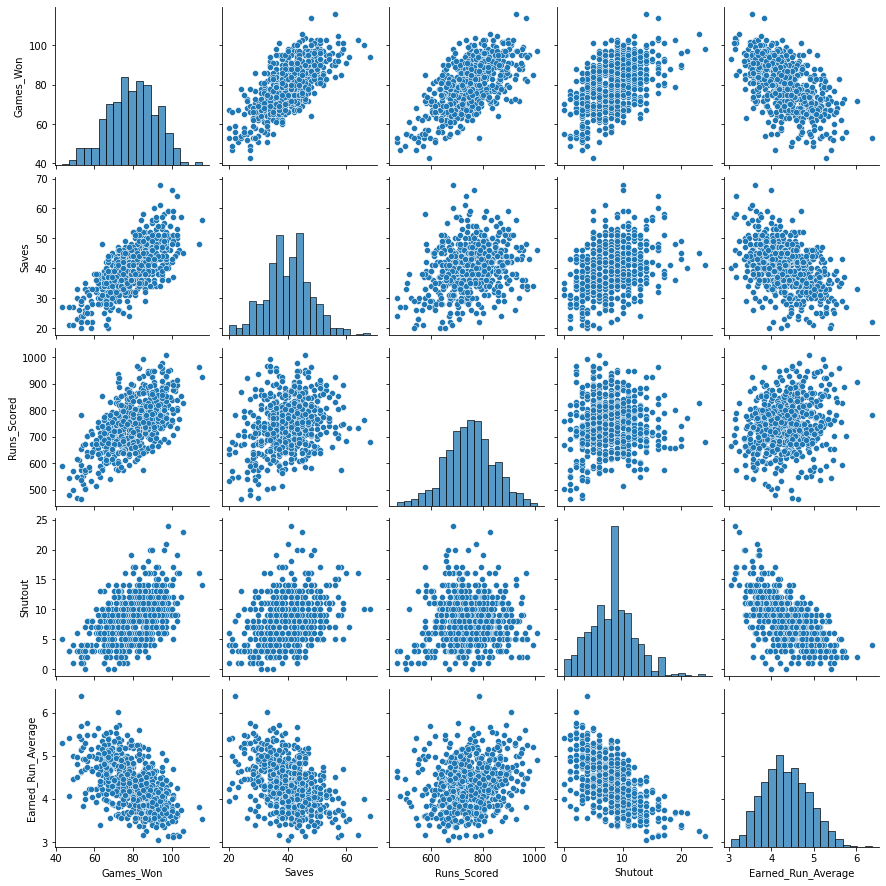

In [ ]:
sns.pairplot(df_p4, vars=['Games_Won','Saves','Runs_Scored','Shutout','Earned_Run_Average'])
plt.show()
# Shows scatter plots for output variable vs input variables

### Evaluation of Period 4 Model
- This model (lm2p4) has a higher **R-squared** (0.923) than the other models, which means that this model provides a better fit to the data than other previous models.

- Variables were chosen based on the correlation with Games Won. The correlation for each variable was also analyzed to make sure they were not highly correlated with each other.

- The intercept, Runs Scored, Earned Run Average, Shutouts and Saves have significant **p-values**. Thus we reject the null hypothesis (that there is no association between those variables and Games Won) for the intercept, Runs Scored,Earned Run Average, Shutouts and Saves.

- The model has 1 offense variable and 3 defensive variables and due to the coefficients, it tends to lean more on the defensive side. It also has least amount of errors in the predictions.

- Saves and Runs_Scored are approximately normally distributed, while Shutout and Earned_Run_Average is slightly right skewed

$y = \beta_0 + \beta_1 \times Runs Scored + \beta_2 \times Shutout + \beta_3 \times Saves + \beta_4 \times Earned Run Average$

$y = 45.3302 + 0.4093 \ * Saves + 0.2658 \ * Shutout + 0.0869 \ * Runs_Scored - 11.3824 \ * Earned_Run_Average $

# New York Yankees and Toronto Blue Jays

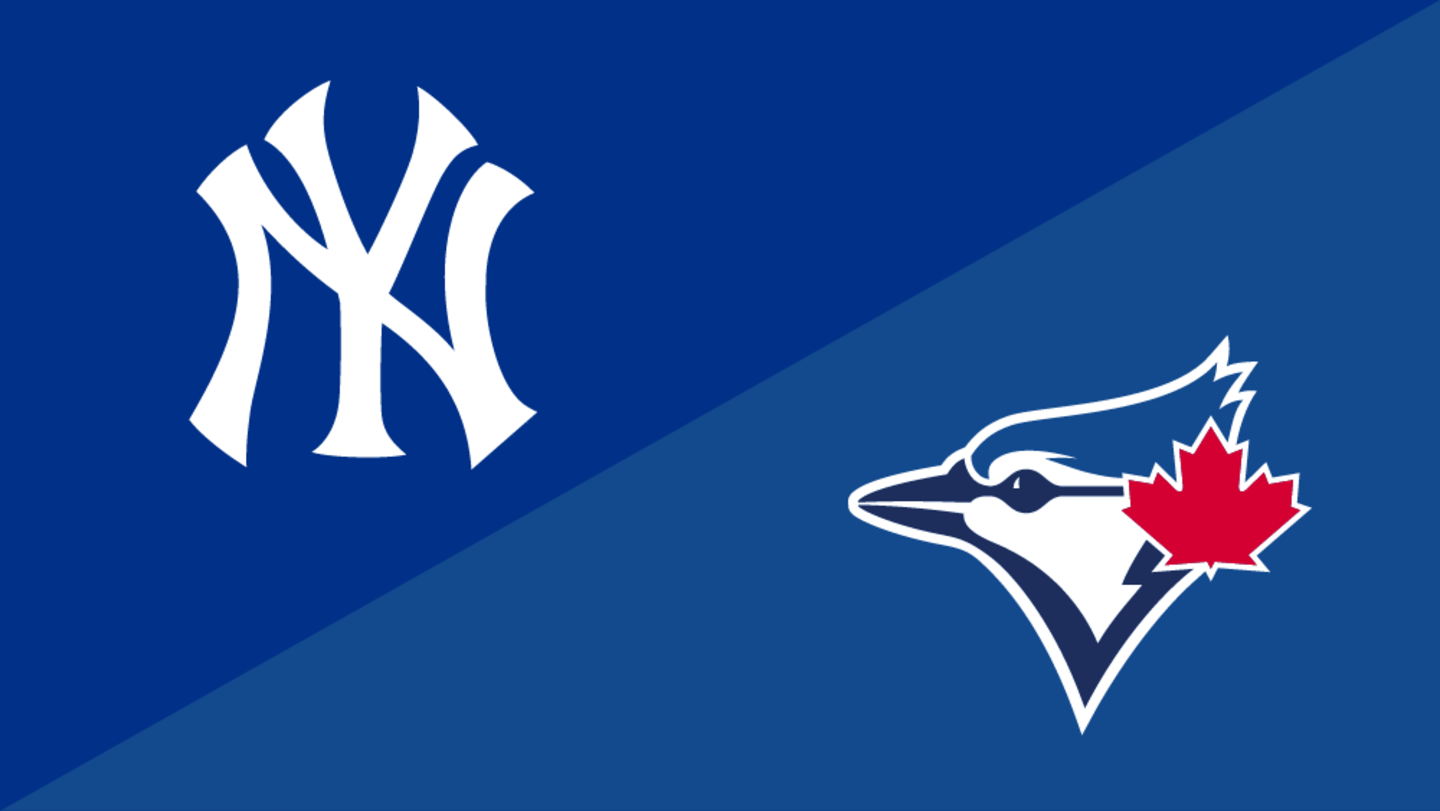

### Making a dataframe for both 2012 and 2015 for Toronto Blue Jays

In [ ]:
df_toronto = df_baseball[df_baseball['Year '].isin([2012, 2015]) & df_baseball['Team '].isin(['TOR'])].set_index('Year ')
df_toronto

League Team  Franchise  Division  Final_Standing  Games_Played  \
Year                                                                   
2012      AL   TOR        TOR        E               4           162   
2015      AL   TOR        TOR        E               1           162   

       Unnamed: 7  Games_Won  Games_Lost Unnamed: 10  ... Hits_Allowed  \
Year                                                  ...                
2012         81.0         73          89       False  ...         1439   
2015         81.0         93          69        True  ...         1353   

      Home_Run_Allowed Walks_Allowed  Strikeouts_Allowed  Errors  \
Year                                                               
2012               204           574                1142     101   
2015               173           397                1117      88   

       Double_Plays  Fielding_Percentage          Team_Name  Home_Ball_Park  \
Year                                                                          
2012          167.0                0.984  Toronto Blue Jays   Rogers Centre   
2015          145.0                0.985  Toronto Blue Jays   Rogers Centre   

       Attendance  
Year               
2012    2099663.0  
2015    2794891.0  

[2 rows x 42 columns]

In [ ]:
df_toronto2 = df_toronto[['Team ' , 'Games_Won', 'Runs_Scored','Saves','Earned_Run_Average','Shutout']]
df_toronto2

Team   Games_Won  Runs_Scored  Saves  Earned_Run_Average  Shutout
Year                                                                   
2012    TOR         73          716     29                4.64       11
2015    TOR         93          891     34                3.80       10

In [ ]:
lmtoronto_predict=lm2p4.predict(df_toronto2)
lmtoronto_predict

Year 
2012    69.527409
2015    96.076122
dtype: float64

In [ ]:
predict_values_tor=pd.concat([df_toronto2["Games_Won"],lmtoronto_predict],axis=1)
predict_values_tor.columns=["actual_games_won","predicted_games_won"]
predict_values_tor["residual"]=predict_values_tor["actual_games_won"]-predict_values_tor["predicted_games_won"]
predict_values_tor.head()

actual_games_won  predicted_games_won  residual
Year                                                  
2012                 73            69.527409  3.472591
2015                 93            96.076122 -3.076122

In [ ]:
rmse_tor=np.sqrt(metrics.mean_squared_error(predict_values_tor['actual_games_won'], predict_values_tor['predicted_games_won']))
print ('root mean squared error', rmse_tor)

root mean squared error 3.2803519404868813


### Making a dataframe for both 2012 and 2015 for New York Yankees

In [ ]:
df_nyy = df_baseball[df_baseball['Year '].isin([2012, 2015]) & df_baseball['Team '].isin(['NYA'])].set_index('Year ')
df_nyy

League Team  Franchise  Division  Final_Standing  Games_Played  \
Year                                                                   
2012      AL   NYA        NYY        E               1           162   
2015      AL   NYA        NYY        E               2           162   

       Unnamed: 7  Games_Won  Games_Lost Unnamed: 10  ... Hits_Allowed  \
Year                                                  ...                
2012         81.0         95          67        True  ...         1401   
2015         81.0         87          75       False  ...         1416   

      Home_Run_Allowed Walks_Allowed  Strikeouts_Allowed  Errors  \
Year                                                               
2012               190           431                1318      75   
2015               182           474                1370      93   

       Double_Plays  Fielding_Percentage         Team_Name  \
Year                                                         
2012          135.0                0.987  New York Yankees   
2015          135.0                0.985  New York Yankees   

           Home_Ball_Park  Attendance  
Year                                   
2012   Yankee Stadium III   3542406.0  
2015   Yankee Stadium III   3193795.0  

[2 rows x 42 columns]

In [ ]:
df_nyy2 = df_nyy[['Team ' , 'Games_Won', 'Runs_Scored','Saves','Earned_Run_Average','Shutout']]
df_nyy2

Team   Games_Won  Runs_Scored  Saves  Earned_Run_Average  Shutout
Year                                                                   
2012    NYA         95          804     51                3.84        9
2015    NYA         87          764     48                4.03        4

In [ ]:
lmnyy_predict=lm2p4.predict(df_nyy2)
lmnyy_predict

Year 
2012    94.753169
2015    86.557625
dtype: float64

In [ ]:
predict_values_nyy=pd.concat([df_nyy2["Games_Won"],lmnyy_predict],axis=1)
predict_values_nyy.columns=["actual_games_won","predicted_games_won"]
predict_values_nyy["residual"]=predict_values_nyy["actual_games_won"]-predict_values_nyy["predicted_games_won"]
predict_values_nyy.head()

actual_games_won  predicted_games_won  residual
Year                                                  
2012                 95            94.753169  0.246831
2015                 87            86.557625  0.442375

In [ ]:
rmse_nyy=np.sqrt(metrics.mean_squared_error(predict_values_nyy['actual_games_won'], predict_values_nyy['predicted_games_won']))
print ('root mean squared error', rmse_nyy)

root mean squared error 0.35820448101070973


## **CONCLUSION**

### **Observations:**

| Periods/Variables | Runs_Scored | Doubles | Saves | Shoutout | Earned_run_average | Strategy | Errors |  |  |  |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |:--- | :--- | :--- | :--- |
| 1| ✓ | ✓ | - | ✓ | ✓ | Balance of defensive and offensive | 7.92 |  |  | 
| 2 | ✓ | - | ✓ | ✓ | - | Defensive | 7.59 | |  |  |
| 3 | ✓ | - | ✓ | ✓ | ✓ | Defensive | 3.95 |  |  |  |
| 4 | ✓ | - | ✓ | ✓ | ✓ | Defensive | 3.33 |  |  | |

### **Business Objectives:**

- The style of play is balanced before 1920 and defensive after 1920 

- The coefficient of defensive variables is higher for the regression models, indicating it had more impact on the output variable ‘Games_Won’

- Period-4 model predicts ‘Games_Won’ for New York Yankees in 2012 and 2015 accurately, while Toronto Blue Jays’ predictions represent the uncertainty of the model (the random component of the error)

### **Analytical Objectives:**
We were able to achieve all the analytical objectives except the error threshold for Period 1 and 2.

### **Next Steps:**
To improve model performance for period 1 and 2 to align with model performance for period 3 and 4 we may have to revisit data preparation steps of CRISP-DM by:

*   Normalizing skewed variables
*   Removing outliers
* Conducting Feature engineering


     
     



## **BIBLIOGRAPHY**



1.   CSDA 1100 course material
2.   Baseball rules from [mlb.com](https://www.mlb.com/glossary/rules)
3. Wes McKinney. Python for Data Analysis, 2nd Edition, O’reilly